## CTR

In [1]:
#coding=utf-8
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from pandas.core.frame import DataFrame
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.linear_model import LogisticRegression
from scipy.sparse import hstack
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.externals import joblib
from sklearn.preprocessing.data import OneHotEncoder
import json
import xgboost as xgb
import os
os.environ["OMP_NUM_THREADS"] = "6"  #并行训练
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

/Users/wjj/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/Users/wjj/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.preprocessing.data module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.preprocessing. Anything that cannot be imported from sklearn.preprocessing is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/wjj/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the

#### 读取train_data

In [2]:
def _load_data(data_file,feature_list):
    data_df = pd.read_csv(filepath_or_buffer = data_file,sep=",", header=None, 
                              names=feature_list)
    return data_df

In [3]:
buy_file = '/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/data/1220/buy_all_balance_feature.csv'
not_buy_file = '/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/data/1220/not_buy_all_balance_feature.csv'
goods_file = '/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/data/1212/goods_feature_1.csv'
user_file ='/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/data/1216/user_feature_less.csv'
 #'/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/data/1214/user_feature.csv'


In [4]:
buy_feature_list = ['index','second_id','s_slug','label']
not_buy_feature_list = ['index','second_id','s_slug','date','label']
#ser_feature_list = ['second_id','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40','41','42','43','44', '45','46','47','48','49','50','51']
user_feature_list = ['second_id', 'birthday', 'phone_model', 'city_level', 'target_weight', 'start_weight', 'latest_weight', 'bmi', 'budget_calory', 'view_goods_count', 'add_cart_count', 'commit_order_count', 'num_paid', 'total_cost', 'record_food_count', 'record_weight_count', 'finished_sports_count', 'habbit_checkin_count', 'post_create_count', 'active_day_count', 'purpose_label', 'activate_channel_label', 'gender_label']
goods_feature_list = ['goods_slug', '1', '2','4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', 'EA1', 'EA2', 'EA3', 'EA4', 'EA5', 'EA6', 'EA7', 'EA8', 'EA9', 'EA10', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'j', 'k', 'x', 'y', 'z', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7', 'class_8', 'class_9', 'class_1', 'p_7394376616792', 'p_7394376616815', 'p_ea10days_1512g', 'p_ea_3daypttp', 'p_easyace_ysjnew_xmy_190828', 'p_easyfun_madai_tea_20', 'p_ef_funsichi_nwlb', 'p_ef_zkxsd_757g', 's_1upbar_20190308', 's_ES_20190724', 's_bh_BH20F_mini_charge', 's_bu_BH20SW_white', 's_cm25_green_coffee_140ml', 's_cm25_gxmydr_300g', 's_cm25_shucai_50g', 's_cm25_yyb_384g', 's_cm25_yykkxin_420g_new_190103', 's_coffee_190819_1_1', 's_ea_dcnx_240g', 's_ea_xckfy_350g', 's_ea_ximeiyin_210ml', 's_ea_yyrtg_36g', 's_ea_yyyxcw_420g', 's_easyace_kfdby_400g', 's_easyace_ysj_new_28g', 's_easyfun_beefdoupu_150g', 's_easyfun_beefrice_160g', 's_easyfun_blackrice_xjyz_zs_qyz', 's_easyfun_chia_120g_180604', 's_easyfun_chiaoat_300g', 's_easyfun_cold_coffee_30g', 's_easyfun_curryrice_160g', 's_easyfun_dizhijixiongrou_100g', 's_easyfun_dongyingong_350g', 's_easyfun_geshidongka_100g', 's_easyfun_guodong_new_360g', 's_easyfun_heimiquan_240g', 's_easyfun_jrw_new_120g', 's_easyfun_jzbc_130g_180709', 's_easyfun_nanguatang_154g', 's_easyfun_niurougan_250g', 's_easyfun_niurougan_250g_180808', 's_easyfun_qmmb_600g', 's_easyfun_sausage_300g', 's_easyfun_suannaigan_200g', 's_easyfun_surou_180815', 's_easyfun_wc_21wancan', 's_easyfun_ximeigan_240g', 's_easyfun_yingzuidou_180g', 's_easyfun_yumixu_tea_40g', 's_easyfun_zimiquan_240g', 's_easyfun_zishuzhou_350g', 's_easys_52_qingduanshi', 's_ef_beef_spiced_100g', 's_ef_dzbtwl_300g', 's_ef_dzdqjrb_80g', 's_ef_dzhjjrc_300g', 's_ef_dzmys_150g', 's_ef_gdbwbdg_50g', 's_ef_gdbxsy_tj_25g', 's_ef_xgscrp_37g', 's_ef_ysalb_160g', 's_ef_yyfs_beef_41g', 's_ef_zuizuidong_360g', 's_gaodanbai_180g', 's_oday_dbb_both_240g', 's_oday_jxr_xl_190604', 's_oday_qiyazibinggan_256g', 's_qianka_1000k_qingliang_20190703', 's_qianka_1000k_zhongkou_20190703']

In [5]:
#goods_df = _load_data(goods_file,goods_feature_list)
#goods_df =goods_df[~goods_df['goods_slug'].isin(['goods_slug'])]

In [25]:
buy_df = _load_data(buy_file,buy_feature_list)
buy_df = buy_df[['second_id','s_slug','label']]
not_buy_df = _load_data(not_buy_file,not_buy_feature_list)
not_buy_df = not_buy_df[['second_id','s_slug','label']]
buy_and_not_buy_df = pd.concat([buy_df,not_buy_df])
buy_and_not_buy_df = buy_and_not_buy_df.sample(frac = 1)
goods_df = _load_data(goods_file,goods_feature_list)
user_df = _load_data(user_file,user_feature_list)

/Users/wjj/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
/Users/wjj/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
/Users/wjj/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [26]:
#这三个类别不平衡
buy_and_not_buy_df = buy_and_not_buy_df[~(buy_and_not_buy_df['s_slug']=='s_ef_dzhjjrc_300g')]
buy_and_not_buy_df = buy_and_not_buy_df[~(buy_and_not_buy_df['s_slug']=='s_coffee_190819_1_1')]
buy_and_not_buy_df = buy_and_not_buy_df[~(buy_and_not_buy_df['s_slug']=='s_ef_dzdqjrb_80g')]

In [27]:
buy_and_not_buy_df['s_slug'].value_counts()

p_7394376616815                      41422
p_easyace_ysjnew_xmy_190828          41004
s_easyfun_cold_coffee_30g            40788
s_qianka_1000k_zhongkou_20190703     40400
s_bu_BH20SW_white                    40241
s_ef_dzbtwl_300g                     40129
s_ef_zuizuidong_360g                 40093
s_cm25_yyb_384g                      40000
s_easyfun_geshidongka_100g           40000
s_cm25_shucai_50g                    40000
s_easyfun_dizhijixiongrou_100g       40000
p_easyfun_madai_tea_20               40000
s_easyfun_suannaigan_200g            40000
s_easyfun_zishuzhou_350g             40000
s_ef_yyfs_beef_41g                   40000
s_easyace_ysj_new_28g                40000
s_easyfun_guodong_new_360g           40000
s_ef_xgscrp_37g                      40000
s_easyfun_niurougan_250g             40000
s_easyfun_qmmb_600g                  40000
s_easyfun_chia_120g_180604           40000
s_easyfun_yumixu_tea_40g             40000
s_ef_dzmys_150g                      40000
s_gaodanbai

In [28]:
print(buy_and_not_buy_df['label'].value_counts())

0        1249362
1        1200629
1         131071
0          92593
label          2
Name: label, dtype: int64


In [29]:
user_df = user_df.drop_duplicates('second_id')

In [30]:
buy_and_not_buy_df =buy_and_not_buy_df[~buy_and_not_buy_df['second_id'].isin(['second_id'])]
goods_df =goods_df[~goods_df['goods_slug'].isin(['goods_slug'])]
user_df =user_df[~user_df['second_id'].isin(['second_id'])]

### 合并数据

In [31]:
#user_df =user_df[~user_df['second_id'].isin(['0.0'])]
#user_df['second_id'] = user_df[['second_id']].applymap(np.int64)
#user_df['second_id'] = user_df['second_id'].astype(str)

In [32]:
buy_and_not_buy_user_df = pd.merge(buy_and_not_buy_df,user_df,on='second_id',how='inner')
buy_and_not_buy_user_goods_df = pd.merge(buy_and_not_buy_user_df,goods_df,left_on='s_slug',right_on='goods_slug',how='inner')

In [33]:
buy_and_not_buy_user_goods_df['label'].value_counts()

1    1059985
0     102996
1      14570
0      10511
Name: label, dtype: int64

In [34]:
del buy_and_not_buy_user_goods_df['second_id']
del buy_and_not_buy_user_goods_df['s_slug']
#del buy_and_not_buy_user_goods_df['date']
del buy_and_not_buy_user_goods_df['goods_slug']

In [35]:
feature_list = buy_and_not_buy_user_goods_df.columns.tolist()

In [36]:
#for i in feature_list:
    #buy_and_not_buy_user_goods_df[i]=buy_and_not_buy_user_goods_df[i].astype('float32')

In [37]:
#for i in range(1,77):
    #buy_and_not_buy_user_goods_df = buy_and_not_buy_user_goods_df.rename(columns={i:'%s'%i})

In [38]:
#change_feature_list = [' EA代餐', ' EA小助手', ' EF轻主食', ' EF轻小食', ' EF轻烘焙', ' EF轻肉食', ' EF轻配餐', ' EF轻饮', ' EF轻麦片', ' 设备']
#num=1
#for i in change_feature_list:
    #buy_and_not_buy_user_goods_df = buy_and_not_buy_user_goods_df.rename(columns={i:'EA%s'%num})
    #num+=1
#del num

### 取出数据和label

In [39]:
buy_and_not_buy_user_goods_df = buy_and_not_buy_user_goods_df.apply(pd.to_numeric)

In [40]:
buy_and_not_buy_user_goods_df = buy_and_not_buy_user_goods_df.sample(frac = 1)

In [41]:
print(buy_and_not_buy_user_goods_df.columns.tolist())

['label', 'birthday', 'phone_model', 'city_level', 'target_weight', 'start_weight', 'latest_weight', 'bmi', 'budget_calory', 'view_goods_count', 'add_cart_count', 'commit_order_count', 'num_paid', 'total_cost', 'record_food_count', 'record_weight_count', 'finished_sports_count', 'habbit_checkin_count', 'post_create_count', 'active_day_count', 'purpose_label', 'activate_channel_label', 'gender_label', '1', '2', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', 'EA1', 'EA2', 'EA3', 'EA4', 'EA5', 'EA6', 'EA7', 'EA8', 'EA9', 'EA10', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'j', 'k', 'x', 'y', 'z', 'class_2', 'class_3', '

In [137]:
#del buy_and_not_buy_user_goods_df['index']

In [42]:
train_df, test_df = train_test_split(buy_and_not_buy_user_goods_df, test_size=0.2, random_state=30)

In [43]:
y_train = train_df['label']  # training label
y_test = test_df['label']   # testing label
X_train = train_df.drop('label', axis=1)  # training dataset
X_test = test_df.drop('label', axis=1)  # testing dataset

# XGBoost+LR

In [44]:
# 定义xgb模型
xgboost = xgb.XGBClassifier(max_leaf_nodes=30,nthread=-1, n_jobs=-1,learning_rate=0.08,
                    n_estimators=100, max_depth=5, gamma=0, subsample=0.9, colsample_bytree=0.5)
# 训练xgb学习
xgboost.fit(X_train, y_train)

# 预测xgb及AUC评测
y_pred_test = xgboost.predict_proba(X_test)[:, 1]
xgb_test_auc = roc_auc_score(y_test, y_pred_test)
print('xgboost test auc: %.5f' % xgb_test_auc)

# xgboost编码原有特征
X_train_leaves = xgboost.apply(X_train)
X_test_leaves = xgboost.apply(X_test)

# 合并编码后的训练数据和测试数据
All_leaves = np.concatenate((X_train_leaves, X_test_leaves), axis=0)
All_leaves = All_leaves.astype(np.int32)

# 对所有特征进行ont-hot编码
xgbenc = OneHotEncoder()
X_trans = xgbenc.fit_transform(All_leaves)
(train_rows, cols) = X_train_leaves.shape

# 定义LR模型
lr_1 = LogisticRegression(n_jobs=-1)
# lr对xgboost特征编码后的样本模型训练
lr_1.fit(X_trans[:train_rows, :], y_train)
# 预测及AUC评测
y_pred_xgblr1 = lr_1.predict_proba(X_trans[train_rows:, :])[:, 1]
xgb_lr_auc1 = roc_auc_score(y_test, y_pred_xgblr1)
print('基于Xgb特征编码后的LR AUC: %.5f' % xgb_lr_auc1)

# 定义LR模型
#lr_2 = LogisticRegression(n_jobs=-1,penalty='l2')
# 组合特征，把编码后的特征与原始特征组合
#X_train_ext = hstack([X_trans[:train_rows, :], X_train])
#X_test_ext = hstack([X_trans[train_rows:, :], X_test])

# lr对组合特征的样本模型训练
#lr_2.fit(X_train_ext, y_train)

# 预测及AUC评测
#y_pred_xgblr2 = lr_2.predict_proba(X_test_ext)[:, 1]
#xgb_lr_auc2 = roc_auc_score(y_test, y_pred_xgblr2)
#print('基于组合特征的LR AUC: %.5f' % xgb_lr_auc2)

xgboost test auc: 0.76443
基于Xgb特征编码后的LR AUC: 0.78212


In [113]:
importances = lr.feature_importances_
indices = np.argsort(importances)[::-1]

 1) 68                             0.030544
 2) EA4                            0.029896
 3) EA6                            0.025721
 4) num_paid                       0.024253
 5) class_4                        0.022865
 6) EA10                           0.021427
 7) total_cost                     0.021416
 8) 2                              0.021137
 9) 41                             0.020252
10) 73                             0.020165
11) 37                             0.019044
12) EA1                            0.018375
13) 60                             0.017743
14) 10                             0.017242
15) 43                             0.016922
16) add_cart_count                 0.015728
17) s_ES_20190724                  0.015237
18) class_2                        0.013782
19) 27                             0.013604
20) EA3                            0.013387
21) 30                             0.012380
22) 35                             0.012259
23) s_oday_jxr_xl_190604        

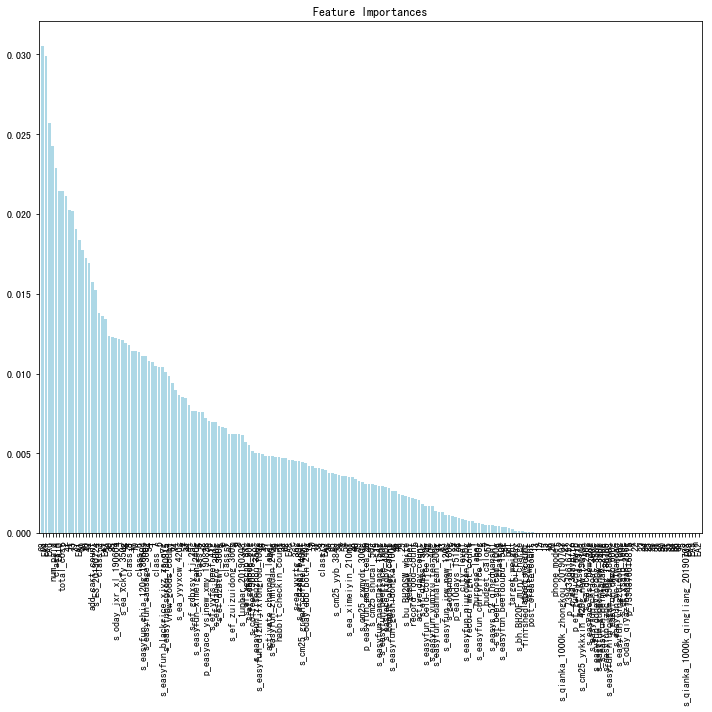

In [117]:
feat_labels_list = X_train.columns.tolist()
feat_labels = np.array(feat_labels_list)
import matplotlib.pyplot as plt
%matplotlib inline
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('./random_forest.png', dpi=300)
plt.show()

In [110]:
col_name = list(X_train.columns)
m = {}
for i in range(len(col_name)):
    m.setdefault(col_name[i], 0)
    m[col_name[i]] = lr.coef_[0][i]
sorted(m.items(), key=lambda x: x[1], reverse=True)

[('70', 5.0690867349064925),
 ('s_cm25_shucai_50g', 1.2910983154353735),
 ('s_easyfun_niurougan_250g', 0.9341657654604647),
 ('27', 0.8745975613392774),
 ('post_create_count', 0.7937107261584062),
 ('s_easyfun_nanguatang_154g', 0.7531684953685507),
 ('33', 0.7043742737402041),
 ('city_level', 0.6192889063530026),
 ('s_cm25_yykkxin_420g_new_190103', 0.6081969801949507),
 ('s_ef_dzbtwl_300g', 0.5893655070065333),
 ('s_easyfun_jrw_new_120g', 0.5592001949085471),
 ('y', 0.5417225895240567),
 ('s_easyfun_wc_21wancan', 0.4929955175955857),
 ('s_easyfun_ximeigan_240g', 0.48339856925754465),
 ('8', 0.4425882035946568),
 ('26', 0.4193165486302701),
 ('p_ef_zkxsd_757g', 0.4034904216108875),
 ('11', 0.39269151281659287),
 ('41', 0.3652144571428826),
 ('39', 0.3484924455717244),
 ('19', 0.34573289886519804),
 ('66', 0.2910977980720874),
 ('s_ef_dzmys_150g', 0.2803302470604073),
 ('p_easyfun_madai_tea_20', 0.27124150137199315),
 ('s_easyfun_niurougan_250g_180808', 0.26777061810181696),
 ('z', 0.265

In [ ]:
#70控制热量
#27即食
#33小袋装
#8Easy Fun 轻饮麦片
#26Easy Ace 其他

In [63]:
#joblib.dump(xgboost, '/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/model/1222/xgboost')
#joblib.dump(lr_1, '/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/model/1222/lr_1')
#joblib.dump(xgbenc, '/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/model/1222/xgbenc')

['/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/model/1222/xgbenc']

0.9999984711339671
0.9999984711339671
0.9999989694594409
0.9999989694594409
0.9999989694594409
0.9999989694594409
0.9999989694594409
0.9999989694594409
0.9999996601307644
0.9999996601307644


In [13]:
#lr_1 = joblib.load('/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/model/1222/lr_1')
#xgboost = joblib.load('/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/model/1222/xgboost')
#xgbenc = joblib.load('/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/model/1222/xgbenc')

In [46]:
# 准确率
y_pred_xgblr1 = np.rint(y_pred_xgblr1)
accuracy = metrics.accuracy_score(y_test, y_pred_xgblr1) 
print("Test Accuracy: %s"%(accuracy))
# 召回率
recall = metrics.recall_score(y_test, y_pred_xgblr1) 
print("Test Recall: %s"%(recall))
# F1值
f1 = metrics.f1_score(y_test, y_pred_xgblr1) 
print("Test F1: %s"%(f1))

Test Accuracy: 0.9062467120906684
Test Recall: 0.996275986630792
Test F1: 0.9505308435538206


In [ ]:
#效果：不对user做特征工程，正负样本比例3:1，AUC=0.91，准确率=0.84，召回率=0.63，F1=0.65
     #对user做特征工程,0.98072,0.9601831494442987,0.9960948695901405,0.9657172629385203
#user特征工程后merge大大减少？？

# predict

In [14]:
predict_file = '/Users/wjj/Desktop/jupyter/Boohee_GBDT+LR/predict_user_feature_data/1222/predict_user_featuere_1.csv'
predict_feature_list = ['second_id', 'birthday', 'phone_model', 'city_level', 'target_weight', 'start_weight', 'latest_weight', 'bmi', 'budget_calory', 'view_goods_count', 'add_cart_count', 'commit_order_count', 'num_paid', 'total_cost', 'record_food_count', 'record_weight_count', 'finished_sports_count', 'habbit_checkin_count', 'post_create_count', 'active_day_count', 'purpose_label', 'activate_channel_label', 'gender_label']
predict_user_df = _load_data(predict_file,predict_feature_list)

In [15]:
predict_user_df = predict_user_df.drop_duplicates('second_id')

In [16]:
predict_user_df =predict_user_df[~predict_user_df['second_id'].isin(['second_id'])]

In [17]:
predict_user_df['second_id'] = predict_user_df['second_id'].astype(int)

In [18]:
predict_user_df = predict_user_df.apply(pd.to_numeric)

In [19]:
goods_feature_list_2 = ['1', '2', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', 'EA1', 'EA2', 'EA3', 'EA4', 'EA5', 'EA6', 'EA7', 'EA8', 'EA9', 'EA10', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'j', 'k', 'x', 'y', 'z', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7', 'class_8', 'class_9', 'class_1', 'p_7394376616792', 'p_7394376616815', 'p_ea10days_1512g', 'p_ea_3daypttp', 'p_easyace_ysjnew_xmy_190828', 'p_easyfun_madai_tea_20', 'p_ef_funsichi_nwlb', 'p_ef_zkxsd_757g', 's_1upbar_20190308', 's_ES_20190724', 's_bh_BH20F_mini_charge', 's_bu_BH20SW_white', 's_cm25_green_coffee_140ml', 's_cm25_gxmydr_300g', 's_cm25_shucai_50g', 's_cm25_yyb_384g', 's_cm25_yykkxin_420g_new_190103', 's_coffee_190819_1_1', 's_ea_dcnx_240g', 's_ea_xckfy_350g', 's_ea_ximeiyin_210ml', 's_ea_yyrtg_36g', 's_ea_yyyxcw_420g', 's_easyace_kfdby_400g', 's_easyace_ysj_new_28g', 's_easyfun_beefdoupu_150g', 's_easyfun_beefrice_160g', 's_easyfun_blackrice_xjyz_zs_qyz', 's_easyfun_chia_120g_180604', 's_easyfun_chiaoat_300g', 's_easyfun_cold_coffee_30g', 's_easyfun_curryrice_160g', 's_easyfun_dizhijixiongrou_100g', 's_easyfun_dongyingong_350g', 's_easyfun_geshidongka_100g', 's_easyfun_guodong_new_360g', 's_easyfun_heimiquan_240g', 's_easyfun_jrw_new_120g', 's_easyfun_jzbc_130g_180709', 's_easyfun_nanguatang_154g', 's_easyfun_niurougan_250g', 's_easyfun_niurougan_250g_180808', 's_easyfun_qmmb_600g', 's_easyfun_sausage_300g', 's_easyfun_suannaigan_200g', 's_easyfun_surou_180815', 's_easyfun_wc_21wancan', 's_easyfun_ximeigan_240g', 's_easyfun_yingzuidou_180g', 's_easyfun_yumixu_tea_40g', 's_easyfun_zimiquan_240g', 's_easyfun_zishuzhou_350g', 's_easys_52_qingduanshi', 's_ef_beef_spiced_100g', 's_ef_dzbtwl_300g', 's_ef_dzdqjrb_80g', 's_ef_dzhjjrc_300g', 's_ef_dzmys_150g', 's_ef_gdbwbdg_50g', 's_ef_gdbxsy_tj_25g', 's_ef_xgscrp_37g', 's_ef_ysalb_160g', 's_ef_yyfs_beef_41g', 's_ef_zuizuidong_360g', 's_gaodanbai_180g', 's_oday_dbb_both_240g', 's_oday_jxr_xl_190604', 's_oday_qiyazibinggan_256g', 's_qianka_1000k_qingliang_20190703', 's_qianka_1000k_zhongkou_20190703']
for i in goods_feature_list_2:
    goods_df[i]=goods_df[i].astype('float32')

In [20]:
predict_user_df_1 = predict_user_df.head(50000)

In [ ]:
##目标是将需要预测的样本映射成onehot向量，就可以直接放入lr得到结果了。肯定不要用所有训练数据，不然就出来很慢。可以多学习onehotencoder的使用
#会不会原始item数据有问题，商品池？
#为什么AUC会好？
#集中的那几个item都是在数据库中没有买过的,都是靠单品或者套餐映射过去的，这里可能的问题：一个单品存在于两个多规格，然后我把他映射为其中一个多规格了。所以这个多规格就多出来很多点击数据。                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       #找徐志拉

user_recommender_dict={}
for index, row in predict_user_df_1.iterrows():
    user_id = int(row['second_id'])
    recommendation_list = []
    out_dict={}
    for goods_index, row_2 in goods_df.iterrows():
        s_slug = row_2['goods_slug']
        s2= pd.concat([row,row_2])
        df2 = s2.to_frame().T
        del df2['second_id']
        del df2['goods_slug']
        df2 = df2.apply(pd.to_numeric)
        predict_leaves = xgboost.apply(df2)
        predict_a=xgbenc.transform(predict_leaves).toarray()
        predict_test=lr_1.predict_proba(predict_a)[:, 1]
        if  s_slug=='s_cm25_shucai_50g' or s_slug=='s_qianka_1000k_qingliang_20190703' or s_slug=='s_qianka_1000k_zhongkou_20190703':
            score = predict_test[0] - 0.00007
        elif s_slug == 's_easyfun_zimiquan_240g' or s_slug== 'p_ea_3daypttp' or s_slug== 's_easyfun_blackrice_xjyz_zs_qyz' or s_slug== 's_bu_BH20SW_white' or s_slug== 's_easyfun_heimiquan_240g':
            score = predict_test[0] - 0.00000008
        elif s_slug == 's_easyfun_wc_21wancan':
            score = predict_test[0] - 0.00003
        elif s_slug=='s_easyfun_curryrice_160g' or s_slug=='s_cm25_yykkxin_420g_new_190103' or s_slug=='p_easyfun_madai_tea_20':
            score = predict_test[0] - 0.0004
        elif s_slug=='p_ef_funsichi_nwlb':
            score = predict_test[0] + 0.005
        elif s_slug=='s_ES_20190724'  or s_slug=='s_easyfun_dongyingong_350g'  or s_slug=='s_ef_dzbtwl_300g':
            score = predict_test[0] + 0.00000006
        elif s_slug=='s_easyfun_niurougan_250g_180808' or s_slug=='s_oday_dbb_both_240g' or s_slug=='s_easys_52_qingduanshi':
            score = predict_test[0] + 0.000000004
        elif s_slug=='s_easyfun_suannaigan_200g' :
            score = predict_test[0] + 0.00000003
        elif s_slug=='s_ef_beef_spiced_100g':
            score = predict_test[0] + 0.00000001
        elif s_slug=='s_easyfun_beefdoupu_150g'  or s_slug=='s_easyfun_jzbc_130g_180709':
            score = predict_test[0] + 0.00000007
        elif s_slug == 's_easyfun_surou_180815':
            score = predict_test[0] + 0.00000005  
            print(score)
        else:
            score = predict_test[0]
        out_dict.update({s_slug:score}) 
    list1= sorted(out_dict.items(),key=lambda x:x[1],reverse=True)  
    user_recommender_dict.update({user_id:list1[:4]})

0.9999997407478203
0.9999997929669107
0.9999989246734288
0.9999998120754229
0.9999850068155568
0.999998907034801
0.8916501699996698
0.9999982304258225
0.999999266281184
0.9998120454307726
0.9999995673179201
0.9999996617923224
0.9999974355638834
0.9999998368502576
0.9999995772593826
0.9999975990029822
0.9999992996670299
0.999999436678959
0.9999997535170179
0.9999957320777166
0.9999997626140412
0.9999997085279585
0.9999993178550083
0.9999975677516677
0.9999940445541574
0.9999982682961639
0.9999997496551767
0.9999996730779922
0.9999873889570944
0.6313484515332424
0.8420131867265191
0.9309663403841001
0.9999974042756938
0.999999821040671
0.9999895875052607
0.9999992573542416
0.9999952578871825
0.9999998244228091
0.9999994947819233
0.9999922256573067
0.9999996835217876
0.9999845731704909
0.9999994496621948
0.9999997002681872
0.9034742653277807
0.9999998248247444
0.9999987651405992
0.9999996938185869
0.9999996555344294
0.9999998282130123
0.9999919511344594
0.9999990490568244
0.99999982136687

0.9750558547434149
0.9999976442728433
0.9426149214727261
0.9999997267732141
0.9999997002681872
0.9999985554789782
0.9999967729634697
0.9999992738744129
0.9999992027766405
0.9999997145271403
0.9999995527916967
0.9999997391227674
0.8670175003597179
0.9802317917630994
0.9999998438070066
0.9999989855567918
0.9999938571025632
0.9999989181088352
0.9999996240675356
0.9999951143078373
0.9999966947994269
0.9999998133509159
0.9999996903704806
0.9999985008570703
0.9999994052566111
0.9999994796058868
0.7361016484464031
0.9999997052799675
0.9999997496551767
0.9999995826909707
0.9999971522861455
0.9999996663160379
0.9999997216916976
0.9999997452765333
0.9999992256277164
0.9999996041533671
0.9999996784940728
0.8963154948639069
0.9999997120852399
0.999999822811191
0.9999995038414442
0.7166602017927883
0.842458763452388
0.9999993454482585
0.8510646037347506
0.9823882816394902
0.9999997643639633
0.9999971332766957
0.9999997271177379
0.8188928846687483
0.9999996926197162
0.999999836257507
0.9999986473408

0.9999992364627277
0.9999971034979728
0.9998825848985922
0.9999996543067627
0.9999992317597791
0.9999995504954431
0.9999997201770129
0.9999994053277201
0.9999995973720397
0.9043582601600647
0.9999889830098608
0.9999997972149667
0.9999996734185004
0.9999995502669279
0.9999975043440567
0.8517152663917689
0.999999446472404
0.7348546639504684
0.999989900263754
0.9999995580522022
0.9999979728386152
0.9999993964030599
0.9999885895722046
0.999992470020456
0.9999990709220391
0.9999995141781858
0.9999876430190843
0.9999996026210105
0.9999996437067402
0.9999997281746973
0.9820229259575013
0.9999990941711674
0.9999983082829146
0.9999997496551767
0.9999995770198273
0.9999992256277164
0.999999059882451
0.9999997201770129
0.8611173391160953
0.9999848856547164
0.999998014005131
0.9999977737719751
0.9999997409319233
0.9999991068193064
0.9999927456745031
0.7351371079133928
0.9999998303749299
0.9999997026402638
0.9999994931437939
0.8525524694978024
0.999999821040671
0.999993447204742
0.9999991589304827


0.999999591635815
0.9999998394641707
0.9999989190469944
0.8265920770623223
0.9999975392281755
0.8408490996973085
0.999999573165253
0.692717348982097
0.9506902952505808
0.9999995863555543
0.9999994527548055
0.9999970364306484
0.9999995576066215
0.9196540967533019
0.9999996593693347
0.9697721296281364
0.999999925323075
0.9999997723499742
0.9999995577812991
0.999999651448402
0.999999888326963
0.9999994460083591
0.7366123065728565
0.9999990531520475
0.9999997713687081
0.9999997820390045
0.9999997951793518
0.9999997675158667
0.9999989933724859
0.9999996689084839
0.9999996688465731
0.9999979656640643
0.9999980793033092
0.9999996392199307
0.9999997389456945
0.9999994369922749
0.9999984023157955
0.999999150188819
0.9999997359725467
0.9999994811496495
0.9999969612485334
0.9999993747118732
0.9999943024493867
0.9999995035440955
0.9322133641081292
0.9999997809256155
0.9999994365952862
0.9999997977965731
0.9999647639291016
0.9999996261327987
0.9999985370614364
0.9999998168750693
0.9999994799799017


0.9999997669171706
0.9999934560315695
0.9999731056297285
0.9999997965853874
0.8369629537515167
0.9999966998178302
0.999999524456355
0.999999669492104
0.9999994515634608
0.9999934067754167
0.9999995825809754
0.9999996564076392
0.9999996639780814
0.9999993582159523
0.9999882782237566
0.9999997518305321
0.9999994255459305
0.9639199472018771
0.9999992484154503
0.9999996442532335
0.9999990643991211
0.9999994982617694
0.9999986230934743
0.9999997271177379
0.9999997929669107
0.9999990015935044
0.9999994000761074
0.9999878880960972
0.999999751096865
0.9774313613711166
0.999999697095331
0.9999994736103893
0.9999993699353814
0.999997248679094
0.963286411720634
0.9999997504530106
0.9999997667486591
0.9999993041918941
0.9999997032468642
0.9999994079000635
0.999999283901731
0.8512093026220915
0.9999992439839142
0.9999958724980541
0.9999991099865067
0.9999993765086809
0.9999998017461622
0.8443919601555256
0.9999968629665884
0.9754116574444603
0.8421457198940524
0.999999597483007
0.999999750081907
0.

0.9999997382494186
0.9999998547641287
0.9999997504685324
0.999998758847089
0.9999997281746973
0.9999910815123698
0.9618203483229449
0.9999994381102671
0.9999796292010222
0.8457251304585747
0.9999893202324626
0.9999998117780899
0.999999821040671
0.9998877300289722
0.8631350849203785
0.9999993996487962
0.9999997727979429
0.9999996242052309
0.9999997271177379
0.9999744621134415
0.9999997579068524
0.9999997496551767
0.9999998575700154
0.9999974339194476
0.999999529338966
0.9999986490826236
0.9999996692168976
0.9999990349584723
0.9999992488335576
0.999998521891289
0.999999821040671
0.999998996861592
0.9999916477119818
0.8596560023819614
0.9090190924054755
0.9999984825882036
0.9999997674401435
0.9999739120652299
0.9999995041398541
0.9999994898190488
0.9999969026617357
0.9999995176742015
0.8657055912710342
0.9114323573346037
0.9999990632325201
0.74058795746433
0.9999958023603137
0.9999996173449032
0.9999990248743719
0.9999996593693347
0.9999571123936469
0.9999997570945671
0.9999996759755566
0

0.9999979277397105
0.699611103529626
0.9999995560070308
0.9999659832528753
0.9999980124247829
0.9999979593418724
0.44591093150310573
0.8018226807014472
0.9999950381252628
0.9999983332151752
0.8467929742702593
0.9999997233456275
0.9999883897594274
0.9999974188606368
0.9999996546573849
0.9999996225273317
0.9999995059978247
0.9999994719877887
0.9999996874945919
0.9999977837262177
0.9999980562064742
0.9999964424005521
0.9999994664726453
0.9999990400005415
0.9999992415164761
0.9999995584995794
0.8688799670100026
0.999999332488166
0.9999992451493245
0.9999996721733909
0.9412385317763713
0.9999902826870979
0.9999993165547798
0.9647708318459252
0.9999736226162473
0.9999976652180863
0.9999996391542457
0.9999995316277898
0.9999995730660307
0.9999996658253931
0.999988085961563
0.999977943805885
0.9999994931437939
0.9999996437067402
0.8289805482438233
0.9999914175469324
0.9999962089888161
0.9999989613266089
0.9999943784559917
0.906896800735233
0.9999994137158534
0.9999990133773131
0.95847926241548

0.9999994941041561
0.9999997795196536
0.9999995888633675
0.9999866104829019
0.999999680773651
0.9190359525272586
0.9999994492135393
0.9999997320677111
0.9999997929669107
0.9999478597473227
0.9999996250689097
0.9999994767022594
0.921114561976959
0.8758067037749915
0.9999995999024918
0.9999997216916976
0.9999998255832921
0.9999995589965891
0.7729223633827419
0.999997235161951
0.9999995960416258
0.9999998109166612
0.9999996794029067
0.9999997056941793
0.9999866367043185
0.9999840346610374
0.9999997254074651
0.8804376420629212
0.9999997255430307
0.999999672931372
0.9988652414690181
0.999998825094348
0.9999997407478203
0.999998475988735
0.9999995567339263
0.9999992940686888
0.999999318486409
0.9999971176909094
0.9999996982603844
0.8990574038997924
0.9999996975960068
0.9999997145271403
0.9999993594751491
0.999999680773651
0.9999995290226158
0.9999927139414759
0.724032290631493
0.973611532717556
0.9954130961270031
0.999999730064837
0.9999997601359021
0.9080208498340393
0.9999981199640718
0.83

0.9999997145271403
0.9999996559245545
0.9999996686770479
0.9999998307405784
0.9999997147170361
0.9227057022383711
0.9914355980639885
0.9999996721733909
0.9999967230931284
0.9999996021360025
0.999988773380358
0.9999994027711281
0.9999815780341088
0.9260290474204927
0.9999996859309462
0.9999970765902858
0.8025631484052727
0.9999984369567471
0.999999818942962
0.9999753806402333
0.9623883493881477
0.9999996136641229
0.9999997543759569
0.5236865651032445
0.999999337252487
0.9999985994224168
0.9999996231497617
0.8129785881180951
0.9999992418751605
0.9999996473803024
0.9999993086586881
0.9999972718855545
0.9999996934839606
0.9297731243200188
0.9999997441830669
0.711373764046993
0.999999190017451
0.9999862708611821
0.9999996629764301
0.9999997359725467
0.7661034814713975
0.9999995419972677
0.9999997981257631
0.9999996075523265
0.9999996549197684
0.9999995987747631
0.7599508351957872
0.9517609086194619
0.7489027051875891
0.9999986889947575
0.9999996007939925
0.999999101800603
0.9999996463710461

0.9999995708883561
0.9999996982603844
0.9999995379078915
0.869802037702911
0.9999997216916976
0.9804665633677928
0.9179823730487982
0.9999989512166949
0.9999995527614567
0.9999997787580335
0.9999968454365249
0.9999944190615779
0.9999998003612434
0.6004030219051244
0.9999991839959286
0.9999993902350481
0.9999997124515613
0.9284488166118172
0.9999951834312388
0.9999996645138017
0.9999993164209005
0.9999990001712924
0.9479612386973436
0.999999831380603
0.99998771019236
0.9999990834189156
0.9999996342698161
0.9999868603327633
0.9999995989340449
0.9999993520340958
0.9999981134560434
0.9999997359725467
0.9999997579933798
0.9999990685008646
0.9999997013911957
0.7740161505109566
0.9999992000339752
0.9006073779604111
0.9999994678843257
0.9999996549197684
0.9999993516943485
0.9999995690618655
0.9999980419081798
0.9999989115330755
0.830060232537537
0.9999996215276273
0.9999942838730664
0.9999993180480408
0.9999995912101151
0.9999974773300435
0.9999998901325561
0.9999998263405281
0.999999868331099

0.9620159606643659
0.9999996208187276
0.9999989535195277
0.9999958630740337
0.9999998272350068
0.9999995485017514
0.9999893224342945
0.9999993282651077
0.9999993635800962
0.9999985711836451
0.9999997598980525
0.9999993574655913
0.9999999154302366
0.9999997846125258
0.9896283253631845
0.9999981503913777
0.9999971501299981
0.999999685589155
0.9999998927098321
0.9999994898190488
0.9999994949939999
0.9999988990525445
0.9999996908719037
0.9999982377986832
0.9999995165694706
0.8945306373040273
0.9999998443854043
0.9999995234133853
0.9881254938288595
0.9999996291668556
0.999999618087193
0.9999970113647828
0.9999880709367054
0.9999994409086844
0.9999995967166517
0.9999970129643834
0.9999997633344474
0.9999995678914698
0.8299901401707939
0.9999996221088929
0.980991641042088
0.9999997862009924
0.9999996802815816
0.9999995978791709
0.9999982761406548
0.9999983508433659
0.9102077626712295
0.9999940957480364
0.9999998938190889
0.9999998821881694
0.9999987996358176
0.9999995983456924
0.9999995991329

0.9999982409031891
0.9184743819913759
0.9999998212792294
0.9999945359596588
0.9999997518910843
0.9999995104858167
0.9999857664669234
0.9999997137528059
0.9999994601639098
0.8987627411407754
0.9999996343060439
0.9999998443854043
0.9999983443409047
0.9999980451316416
0.8221004919670587
0.9999967591607548
0.6940342608380202
0.6904787591666752
0.9999997268943449
0.9999997236763287
0.9999994053277201
0.9999995828379221
0.9999995675222726
0.9999992323108685
0.9999993776444541
0.9999995209894847
0.9999980688053522
0.9999985738015532
0.9999989252229422
0.9999998458919348
0.9999994034430175
0.9999973136257877
0.9999880443098648
0.8199870911968969
0.9999995896233294
0.9999996108291986
0.999999313860328
0.9999997873555242
0.9999987541393098
0.9999995353601218
0.9999997627196626
0.9999998726760349
0.9999995332192502
0.9999996982603844
0.9999996614034478
0.9999980348569366
0.9999997575975922
0.9999997968220498
0.9999994799055218
0.9999989694169522
0.9999996493785542
0.9999982166272295
0.99999917595

0.9999965290350125
0.9999996658253931
0.9999998606735545
0.9999996540958144
0.9999956300421781
0.9999996146657606
0.9999996849574294
0.999999008919162
0.9999996566937055
0.9999949399900083
0.999999847339497
0.999999719073431
0.9999915675805232
0.999999309807674
0.9999992392459349
0.9999906316144792
0.8981887664101897
0.7795424416763581
0.9999996363210024
0.9188150874656851
0.9999980965651667
0.7129159955372569
0.8134692471936408
0.9998968867720773
0.783182009531701
0.999999442476258
0.9999979216585504
0.9999994362476519
0.9999993564834687
0.8853367803662254
0.999999789447644
0.9999998031637285
0.9999997585021692
0.7998267106281255
0.9999993654680372
0.9999976115757839
0.9999989126317478
0.9999996193663222
0.9999995709488325
0.9999935398735114
0.9999997166869892
0.9999995120240694
0.9999997050676238
0.9999994667772948
0.9999991611776536
0.9999976188645473
0.9999997289103557
0.8844179444748927
0.8820575577000183
0.8578442125790783
0.9999996261333367
0.9999997216916976
0.9999997023444671


0.9999997204169192
0.9999998095965441
0.9999994422999244
0.9999996002161692
0.9999997271177379
0.9999994637469264
0.9999996792083591
0.9999994909139229
0.9511275306419434
0.999999699271031
0.999999734523748
0.9999990317253746
0.9999998540581408
0.9999787958600825
0.9999995952573686
0.999999536653316
0.9999994590254732
0.824651841696599
0.9368818988663908
0.9999869447830347
0.9999996578627506
0.999999537046666
0.9999995015775842
0.9999992630074439
0.999999582080971
0.9999987442717262
0.9999993019062718
0.9999996802607725
0.9999994755315309
0.9999996062272433
0.999999659546686
0.9999997649383375
0.99999720871731
0.9999994062523794
0.9999997359725467
0.9999997431008564
0.9999998599211606
0.9999996164302234
0.9999995663092469
0.9999997359725467
0.9999998441887584
0.8728060404529813
0.9999997145271403
0.9999996542735188
0.9999986147104147
0.9999997272894766
0.9999987288661014
0.9999995145702448
0.9999993576713169
0.6740325122069983
0.9999986428554177
0.9999993972584008
0.9999995991329691
0.

0.9999997630756895
0.9999998701636905
0.9999994043717428
0.9999998141704207
0.9999977958620256
0.9998643461757181
0.9999996488109922
0.9999995726296889
0.861287259678838
0.9999997489217011
0.9999992691469787
0.9999987541953762
0.9999996916310796
0.8249354804099345
0.99999769448044
0.9999984772992144
0.999998792022942
0.9999881314295755
0.9999997543366932
0.7766486517577356
0.9999994496621948
0.9235076356860317
0.9999997830596584
0.999999833342248
0.9999995466152788
0.9999997006502213
0.9999992288467467
0.9999997896314858
0.9999976966528085
0.9999992050111717
0.9999992472595268
0.9999911502022171
0.9999926540709139
0.9479310310635094
0.9492649080387866
0.9222740776023793
0.9999995052042836
0.9076187651447012
0.9999994763226613
0.9999993242825139
0.9999993923791577
0.999998242552449
0.9999994232377697
0.9799633099292838
0.9999995881588823
0.9999977092452971
0.9999994898190488
0.9027919190711619
0.8389989987058852
0.9999997630756895
0.9999996973466055
0.9999882866269043
0.9999873486377848

0.9999995857428348
0.9999994771169506
0.999999556987317
0.9999995245269937
0.9999996784044204
0.9999992223083056
0.9999996738075294
0.9999998344478113
0.9999997157712291
0.9999926643295167
0.9999997985666575
0.9999992744612334
0.9999888968450074
0.982758051496974
0.9999993045114234
0.999983527457437
0.9999939950801541
0.9194661525654096
0.9999956942676551
0.8945223243671033
0.9999995989580063
0.9457432197509883
0.9999956310699175
0.9999998984248029
0.9999998737025945
0.9999890618417578
0.9999990514903093
0.9999996413882358
0.9999997450712937
0.9999565785759605
0.9999989077331622
0.9999997606378838
0.9999993869619165
0.9999998349210109
0.9999982962444052
0.9999995839868455
0.999999693846096
0.9999996142734694
0.9999991446800115
0.9999995834915859
0.9999992000749296
0.9999996217739823
0.9999978989465443
0.999998901708337
0.9999998128558636
0.9999998874308623
0.9999987840845858
0.9999995459216804
0.9999998378821093
0.9999995699373884
0.999999010241467
0.9999996888839056
0.9292750739545457

0.9999997255430307
0.9999934079020076
0.9999993881537307
0.9999994024555501
0.9999989780257975
0.9999984337423842
0.9999951511259082
0.999999869907925
0.9999997926737964
0.9999962508183576
0.9999998377647631
0.9999988972912265
0.9999756206701367
0.9999995447196751
0.999999177530741
0.9999925315419892
0.9999946162466105
0.9999988000884025
0.9999994974432261
0.7520719268125436
0.9999891081344224
0.9999871623668712
0.9999995580522022
0.9999976218565654
0.9999928019100541
0.9999995913725763
0.9736174822580009
0.9999998885955446
0.7336266036637987
0.9999986498085376
0.999999317279698
0.9999967417048831
0.9999987887876145
0.999999734523748
0.9999994898190488
0.9999995771543994
0.999999408866841
0.9999997949151135
0.9999996767353483
0.9999997161320876
0.9630431273461975
0.9999881281497911
0.7784393363968287
0.9999991740640248
0.9999956073621022
0.9999818925788775
0.9999990741710343
0.9999995730660307
0.9999991024554409
0.9999997622657594
0.9999996787013127
0.9999982939501583
0.999999621318770

0.9999999004191603
0.9999996419591947
0.999999545578231
0.9999996575503611
0.999999057021101
0.9999996849574294
0.9999995556417947
0.9999998038913979
0.9999916082502482
0.9999996859309462
0.9999998273659968
0.9999991582514398
0.999999817222993
0.9999992691469787
0.9999991566856458
0.9999997216916976
0.9999998211226105
0.9999997861233694
0.9999995635767389
0.9999992770531103
0.9999997768388814
0.9999995771020943
0.9999967059686857
0.999999668767299
0.9999997216916976
0.9999997498662561
0.9999996255602546
0.999999777307851
0.9999996345640607
0.8727184131539663
0.9999978920936738
0.9999984175433425
0.9999998548523759
0.7545496857785731
0.9999989549373547
0.9322710568331378
0.9999982378447692
0.999999580394454
0.999999680773651
0.999999268710137
0.9143355231848204
0.9999995599975491
0.9908797550418106
0.9999904440539488
0.763036447117324
0.9999970707849318
0.9999985378235696
0.999999680773651
0.6804410496607722
0.9999996371030239
0.9999983150963578
0.9999988962817323
0.9999989385804268
0.9

0.9136461135913737
0.9999998954783369
0.9999995339452827
0.9999997145271403
0.9999990969903096
0.9083915684559389
0.9596039057181618
0.9999980073504181
0.9999967105636591
0.8483405995712893
0.9999997886051766
0.999999300120739
0.9049831823107624
0.8717590603036713
0.9040492388254691
0.9999997301830623
0.8965698468618835
0.9999994462122644
0.9408627888756176
0.9999998221661076
0.9999996901057324
0.9999997271177379
0.8223463001704594
0.9999998436181013
0.999998392232384
0.9999991663037892
0.999999685288271
0.9561272006244197
0.9999996305132739
0.9999973089832186
0.9999994776728706
0.9998243262914335
0.9999997216916976
0.9999996463543895
0.9999998188791881
0.9999996848381014
0.9999996012846836
0.9999969646100606
0.9999798283628251
0.9999990745611539
0.9997328811645223
0.9999993484689125
0.9112141159689823
0.9999997667486591
0.999999358891496
0.9999995952573686
0.9999999005947176
0.9999993465219872
0.9859604145848355
0.9999994695174563
0.9999983740653737
0.9999972683973538
0.99999812398760

0.999997314102609
0.9999995328476439
0.9999994549904931
0.999999465219959
0.9999979855807126
0.9999893460827697
0.9999997209577971
0.9999999031519206
0.8857266238331193
0.9601227085679358
0.9999996399791747
0.9999993030463254
0.9999984122004757
0.9999995330026491
0.999999880744539
0.999999828852665
0.9999997045255888
0.9999996593693347
0.999999903806861
0.9999998138371299
0.9999997050676238
0.9999921113488098
0.999999675728127
0.9999999134584817
0.9999995131046812
0.9904926959741879
0.726028062060648
0.9999994678843257
0.9999994816283934
0.9999993315204202
0.9999922085821124
0.999973957702327
0.9999995040904567
0.9999997230750859
0.9999997567010401
0.9999995878848225
0.9999997001204086
0.9999862633445562
0.9999997393019171
0.9999998640749059
0.9999994440728086
0.8413949364521326
0.999999746157337
0.9999999532223592
0.9073049818565347
0.9999990889523012
0.9999973408925781
0.9999995958761189
0.9999993764327679
0.9999995456712567
0.9999997216916976
0.9756169764343369
0.9999996004636503
0.

0.9999958577098516
0.980602669583983
0.9999997555926514
0.9999997374434785
0.9999926820008234
0.9999988868782588
0.9999869519797508
0.9999997704732854
0.9999871925539421
0.9999996371030239
0.9999966766763161
0.999997582799412
0.9063639091945911
0.6745728557573492
0.9999998350304796
0.9999996908642427
0.9999996859309462
0.999999108259234
0.9999997194288855
0.9999994248054589
0.9999991308066157
0.9999997101770052
0.8013443563493668
0.9999860567647733
0.9999997350969381
0.9583914113895162
0.9999994217104994
0.9999917795358886
0.9999931835676641
0.9999996952226279
0.9999982795939789
0.9999993260747239
0.9999864591541053
0.9999998670858363
0.9999990184208456
0.9999992301277827
0.9999950091084684
0.9999993519589137
0.999999414202325
0.9999984048536518
0.9999994678843257
0.9999997682533839
0.999962749540514
0.9999997963748377
0.9999993852478791
0.9999994635197412
0.9999994205729269
0.9999946382714185
0.8196477765553363
0.9999932118724946
0.9998647595579772
0.9999982603783718
0.999999680204076

0.9999982809539126
0.999999111351037
0.99999974569329
0.9999997216916976
0.9999995002580254
0.8982647358695848
0.9999997677652972
0.9999996159096427
0.9999997501606938
0.9045737406745388
0.999999704810768
0.9999995926141662
0.9999997415623609
0.99999724816569
0.9999994911691419
0.8979184648921228
0.9068959264457747
0.9999997271177379
0.9999998692199187
0.8780295813394772
0.9559745369886786
0.9559954615271526
0.9999996849574294
0.999997606310869
0.9255506854810335
0.9999935889793271
0.9999989532181017
0.9999998077425252
0.9999998167738003
0.9999987836578551
0.9999993698601901
0.9999990945188693
0.9999997758921371
0.9999998319530868
0.9999967020133943
0.9999993374226924
0.9999999066630767
0.9999967281577464
0.9999986027917473
0.9999995413228349
0.9999998505899498
0.95332004337474
0.9999995675384445
0.9999984198631442
0.9999991646667493
0.607928416149405
0.9999993986497941
0.6746849307471666
0.9999995494070797
0.9999992962141177
0.9999980641269787
0.9999994281307836
0.999998145999557
0.99

0.9999578850021217
0.9999996120434537
0.9999874232407133
0.9999993648436719
0.9999996731640859
0.9999992927622561
0.9999998462152483
0.9999992384926825
0.9999994755229744
0.8688261112183632
0.9999995099141012
0.9999995966379307
0.9999996172978777
0.9999997727979429
0.9999998948213564
0.9999894488329417
0.9999999042010435
0.9999986302243987
0.999986549302197
0.9999998604557899
0.9999989179688364
0.9999970348346778
0.9999996899428635
0.8646725508431524
0.9999996760453472
0.9999983819324348
0.9999998421209015
0.9999994791349862
0.9999968019418963
0.9999995518075667
0.9999997374434785
0.9999990874129819
0.9999736460235373
0.9999993605733541
0.9264927147995565
0.9999998497710048
0.9999997795196536
0.9999997050676238
0.9809412723822787
0.999999393371792
0.9999908640063779
0.9999997546249203
0.9999704150108518
0.9999987682229464
0.9999989081877381
0.9999991536801699
0.9999996298315131
0.9999967571245424
0.9999991482661473
0.9409637513271752
0.8634838268192319
0.9999997955234139
0.999999736643

0.9999993600843899
0.9999916374520755
0.9999997216916976
0.9999991819116415
0.994882498469797
0.9999964837030547
0.9999998913386214
0.9999988780535349
0.9999996721733909
0.9999996325659725
0.9999996861836679
0.9999996472202934
0.9999996806533078
0.9999995527614567
0.9999997505169821
0.9999997050676238
0.9999996225273317
0.9999995325983504
0.999999898967681
0.9999949870780734
0.9999996225273317
0.9329398077386122
0.9999996195621232
0.9999995850629417
0.9999934556391173
0.9999993878726241
0.9999995795952912
0.7982816339489288
0.999999171227966
0.999996983181661
0.9999948603921114
0.9999952105443775
0.9999997088362916
0.9999996593693347
0.9999995888633675
0.9999989850129455
0.9999986339306931
0.999999673610498
0.9999997308531252
0.9999994492660036
0.9999991754650981
0.9999945214096067
0.9999990986546395
0.9861912422413148
0.9999994898190488
0.9999993574655913
0.9999996002161692
0.9999996673020841
0.9999990353553982
0.9592519891907408
0.9999995980411457
0.9999996286091057
0.999999095597424

0.9999997123729236
0.9999963133200677
0.9999996107973126
0.9999997927114367
0.9999996585320775
0.9999755262948741
0.9999995580522022
0.9999978835166818
0.999990556928258
0.9999992166230788
0.9999988368556413
0.8047252734091014
0.9999927386990674
0.9999994850906039
0.999999580154444
0.9999990404477791
0.9999994091016208
0.9999994502416326
0.9999995225703256
0.999998787700921
0.9999991333085361
0.9999874986403287
0.999999821040671
0.9999995898503129
0.9999884719678385
0.9999940572906544
0.9999998002393248
0.9999903862499475
0.9999995504954431
0.999991758802747
0.9999995327553662
0.9999988887265099
0.9999994851363126
0.9999886424658937
0.9999981966116834
0.9999997145271403
0.9084401507752861
0.999988018357371
0.9507769549905062
0.9999864174837026
0.9999994632577751
0.8821944593056046
0.43604642514256897
0.9999964446944264
0.9999984934903868
0.9999994132315587
0.9999996666112633
0.999997702204956
0.9999997384805793
0.9999992174193647
0.9999802989389698
0.9999876642057701
0.9999997216916976

0.9999996985472526
0.9999880373238262
0.7405769548248816
0.9999997145271403
0.9999996084300947
0.999999621500549
0.6453197544597633
0.9999997773793368
0.9999996551017121
0.999999618087193
0.9999998547641287
0.999999699271031
0.9999997727979429
0.999986854248732
0.6633354043394956
0.9999995880622602
0.9999994538035507
0.999999273365167
0.9999997757847361
0.9999996692168976
0.5780808162397156
0.9999993879766763
0.999999678648159
0.9999997875598551
0.9999769026775539
0.9999997139276922
0.9999996593693347
0.9999994782329664
0.9999993437348793
0.9999968724028154
0.9999997359725467
0.9999995290982334
0.9999997310837582
0.9999980463038541
0.9999996555537587
0.9999995061762802
0.9999893684269027
0.9999983510371693
0.9999995405737051
0.9999995400994722
0.999999359446009
0.999999489896127
0.9999995644816895
0.9999997097421864
0.979499245194076
0.9999996658253931
0.9999990905161126
0.9999997497337983
0.9999808835581716
0.999975381007558
0.999999741791569
0.9999993196866578
0.99998334220766
0.9999

0.9999997496551767
0.9999996537217227
0.9999996291668556
0.999999821040671
0.9999995782908401
0.9999992256775153
0.999999680773651
0.9538337863135307
0.999999796288391
0.9999910015977148
0.9999996936870762
0.9999996184627713
0.9999996970453046
0.9999950272632042
0.999997022380885
0.943658336860944
0.9999997929669107
0.6926673614243826
0.8741427344890333
0.9999994979585114
0.9999993964799778
0.7497841930395874
0.9999991296986619
0.9999996414724681
0.9999997610481438
0.9999990466592013
0.99998482136185
0.9999997623714869
0.9999995396687128
0.9999984221491655
0.9999895232216515
0.9999997002681872
0.9650918742074323
0.9999997674401435
0.999999718738194
0.9999673412022912
0.9999997081543466
0.8868448810237025
0.9999991365267057
0.9999998547641287
0.9999996551149781
0.9999996440736038
0.9999961565559491
0.9999995810643671
0.9999944072131867
0.9999855957315337
0.999999691483013
0.9999997233456275
0.9999997496551767
0.9999991951587185
0.9999987766245062
0.9999825800606993
0.9999996884792548
0.

0.999989644987812
0.9999994351982766
0.9999994367698362
0.9999995956508252
0.9999997341454019
0.9999962418403957
0.999999678648159
0.9999966605066974
0.9124177717824907
0.9999909038223186
0.9999992239003082
0.9999993656022999
0.8618082622451737
0.9999996062000379
0.9999981957948774
0.9999680252388499
0.9287184555188115
0.9999792461653225
0.9999835727492876
0.9999998285460511
0.9999997201770129
0.9302388939978856
0.9999995460416965
0.999999402715917
0.9999996649439886
0.9999798532607707
0.9999955641455557
0.9999996926410849
0.9999987543919558
0.8665698695188202
0.9999996051894632
0.7793794141619798
0.9999995041398541
0.9999997359725467
0.9999924778006144
0.9999997201770129
0.9999997469097059
0.9999996079715615
0.9999992653243991
0.9999997123256177
0.9999995706826348
0.9999950978596235
0.9999899985936884
0.999999105889942
0.9999994072091974
0.9999996514245446
0.9999994126778731
0.9999996240675356
0.9291725830193902
0.9999998322180801
0.9998921576813425
0.9999982097634752
0.99999916335289

0.9404156623880083
0.9999998438070066
0.9999997669104869
0.9999985504724684
0.9999997216916976
0.9999990076810322
0.9999931635768774
0.9999983304887771
0.9999997052518541
0.9999997201770129
0.9999997950592003
0.9999989550741976
0.9999996076226672
0.9999864264476673
0.9430108127046738
0.9999997216916976
0.9999997496551767
0.9999995778263514
0.9999975793062492
0.9999996031362473
0.9999995577812991
0.9999997099692768
0.8671582111642523
0.9999995504954431
0.9999997309879212
0.9999878539739298
0.8509123855780063
0.7670785595290007
0.9999998337600138
0.9999861379699044
0.9999998248247444
0.9999983309868786
0.99999958759468
0.9999993977249887
0.7512944769084479
0.9999995487188598
0.9999995611800218
0.9999994898190488
0.9999997382494186
0.9999998438070066
0.9999994310529114
0.9999995912279726
0.9999993559907877
0.99999981873001
0.9999890019873005
0.9999995939515995
0.7237135092313293
0.9999994819018678
0.9999997938930132
0.9999996196433952
0.9999995681226485
0.9999987968497543
0.99998543921898

0.999999161602174
0.9999989537236251
0.9999996947230674
0.9999994388495271
0.999999864317854
0.9999972780041706
0.9999979377578755
0.8097994603920062
0.9999939997785935
0.9999989165203339
0.999998237692905
0.9999885408970962
0.9999993501849711
0.9999998031637285
0.9999957594470059
0.999999871406577
0.9999998450445285
0.8277426964153932
0.9999997145271403
0.9999982446952501
0.9999993230934929
0.9999995437383871
0.8882360722621725
0.9999999189292321
0.9999997826276036
0.7765873011460629
0.8989692278014226
0.999999795358215
0.9999990736133211
0.999998742620414
0.9999989050413537
0.9999993744022042
0.9999958745333128
0.9601710969702433
0.8647023815993391
0.9999983134777422
0.9999997601359021
0.9999998185719973
0.9999994949939999
0.8714513618798957
0.9999979016165215
0.9999988586480316
0.9999997429523453
0.9999915884218621
0.9999996516130333
0.9999960596846382
0.9999998094585636
0.9999990736133211
0.9656643738056537
0.9999991054023276
0.9999991740018478
0.9999996669604069
0.9999992053306622

0.9999977693141362
0.9999994538294026
0.9999994884648321
0.9999988883535715
0.9999994548462553
0.9999997216916976
0.9999994254130881
0.9999998187530968
0.9999996250689097
0.9999986382967079
0.9999995943558319
0.9990406328598535
0.9999989756970344
0.999998641081027
0.8958976396287857
0.9999998014869257
0.9999935681846762
0.999999247250135
0.9999996948746669
0.9999992892139586
0.9999995965638936
0.9999982620827035
0.9999832331772343
0.9999997428814206
0.9999992510880273
0.9999997167342644
0.9999998439006943
0.9999995297662326
0.9999993016507259
0.9999997411051285
0.9999994218565503
0.9999995332192502
0.9999996530992326
0.9999995056808662
0.9999993726609174
0.9999990771713839
0.5805087698300324
0.9999997088362916
0.9999978771241305
0.999999456358505
0.6348636949344495
0.9999993563680903
0.9999997907208372
0.9249575624808958
0.8845481025313143
0.9999996763610988
0.9999978433809059
0.9999995453409195
0.9999995573387875
0.9999936418326074
0.9999992397883073
0.9999992013863027
0.9705135377859

0.9999990936475097
0.9999986388680097
0.9999994972834413
0.9999997811257124
0.9999974262502384
0.8595435960363256
0.9999995194707527
0.9999997795196536
0.8993774234649715
0.9999996359020358
0.9999995241669516
0.9999993744320095
0.999998584106413
0.9999992194704352
0.9999998020026354
0.9999984927188413
0.9940436043517132
0.9519639137803819
0.9999998783734825
0.9999997619436785
0.9999997455832357
0.999999081200701
0.9999999035900369
0.9999997728976212
0.9999968685413815
0.9999969593186276
0.9999996939193753
0.9999996778310948
0.8878432381694383
0.9999994054010148
0.9999998717030644
0.9999995519779327
0.9999980497964408
0.9999996235192962
0.9999990700941404
0.9999990962445506
0.9999998443854043
0.9999996965734363
0.9999998507330968
0.999999680773651
0.9999997929669107
0.9999935438509622
0.9999997145271403
0.914979712942366
0.9999995778570253
0.9999998543623654
0.9999996414564991
0.9999995404954994
0.9999984069799368
0.9998893862958781
0.7578666457918499
0.9999979789577688
0.99999972149876

0.9652327891805906
0.9999998024313724
0.9999995609794518
0.9999989758575355
0.9999988691421325
0.8897844592644432
0.9999983876816531
0.9999995618874472
0.9999860431022488
0.9999991850140308
0.9999998502723304
0.9999997727979429
0.9999998670858363
0.9999997075617647
0.9999994112832014
0.9999999362402563
0.9999989793432487
0.9999985679117342
0.9999998443854043
0.9999993958314186
0.9999998356642062
0.9999954016744126
0.9999982886246764
0.9649762570896874
0.9999989446704396
0.999999415335188
0.9999997949151135
0.9999999365382745
0.999999611176481
0.9999977825970163
0.9999997564635016
0.9999919010532534
0.9370122577849922
0.9999982890061329
0.9999995673086668
0.9999917124994118
0.9999994674803513
0.9999937693205905
0.999993638701981
0.9999997227736218
0.9999996747266454
0.9999988464790281
0.999999506285979
0.9999996225273317
0.9999981012819528
0.9999996047209868
0.9999982744729428
0.9999990073240544
0.999985409782244
0.9999995210847229
0.9999996322494394
0.9999998380753834
0.894039981149394

0.9999991812134978
0.9748191666196234
0.9450114538981347
0.9999997376369465
0.7352406847744992
0.999977295853219
0.7947351519582958
0.999999723879064
0.9999984499276342
0.9999994898190488
0.999999454021435
0.9999996972225795
0.9428167889321707
0.9999996852727381
0.9999997009241063
0.9999998575700154
0.9999885164284867
0.9999996593693347
0.9999932061237101
0.9999994352742348
0.9999995504954431
0.9999995527614567
0.9999996336041749
0.9069058233623034
0.9999998231093269
0.9999995142669911
0.7900210831653798
0.9999998419284374
0.9999979544804802
0.9999995348065183
0.9999946500674228
0.8900967417162129
0.9999969989277238
0.9999996261333367
0.9999996204324472
0.9999996026443614
0.7181425653385517
0.9999998340104034
0.9999995127768281
0.9999989886059919
0.9999831605656323
0.9999998262237069
0.9999717457211391
0.999999375989708
0.9999996212983995
0.9999986973087343
0.9999990169502276
0.9999986991741286
0.9999996884792548
0.9999994423560533
0.9999996292423914
0.9999997022527938
0.99998656356833

0.8123039760984497
0.9999994513711851
0.9999994868908232
0.9999997324696747
0.9999997681947197
0.9999997050676238
0.9401798187506458
0.9999954541342639
0.999999680773651
0.999999680773651
0.9303468103509567
0.9999993388086631
0.9999998117135394
0.9999988547667137
0.9999986909069448
0.9999992298770127
0.9999997762409971
0.9999996644215847
0.9999993621536655
0.9999994466544395
0.9999940854222596
0.9999983961392287
0.9999736394546054
0.7598450247297328
0.999999716427736
0.8958790964861778
0.9999997421911875
0.9999990700941404
0.9851547459446205
0.9999998612048515
0.9999965996675622
0.9999981453311869
0.9999995815074463
0.999999699271031
0.9332484883333291
0.9999986284484582
0.999999821276923
0.9999996546573849
0.8970811074874004
0.9999995456712567
0.9999994195878951
0.9999990660385252
0.9999952379102194
0.999981241479027
0.9999997359725467
0.7299671377616586
0.7833848589633243
0.9116780314722748
0.9999889853717671
0.999999815166152
0.999999680773651
0.9062366699358322
0.9999990116136
0.99

0.9999993045114234
0.9999817346526368
0.9999994197761918
0.9999995358652882
0.9999997714742088
0.9999995999246931
0.9167982880659038
0.9999995497178772
0.9999996263721679
0.9999996622753861
0.9999966383184776
0.9999994682748957
0.9999824033328684
0.999999281519661
0.9999988618693483
0.9999996647072151
0.9999995504954431
0.999998639159863
0.9999993138489829
0.999999551702433
0.9999996007939925
0.9170574200705746
0.9999997216916976
0.9999990736133211
0.9999978501026787
0.9999983825525816
0.9999996593693347
0.999998830538778
0.9999994370114276
0.9999996327842421
0.9274130282624696
0.9999997384418245
0.9999997327154044
0.9822214596807312
0.999993413034925
0.9999993944939981
0.9999997275249453
0.9999995324325202
0.9999994015346424
0.9999995466592081
0.9999987475022174
0.9999994149468616
0.9999993639440994
0.9999995553510385
0.8833047043131079
0.9999994641777137
0.9999994206298054
0.9999995674717401
0.9999900966954853
0.999999755824853
0.9794055776275289
0.9448696571539984
0.9776097107064678

0.5001401228096939
0.999999836257507
0.9999993944166894
0.9999996372761627
0.9999991629929756
0.7902129902415145
0.9999975839009361
0.9999931023150741
0.9999996896800978
0.9999997809256155
0.9999996677557527
0.9999995628880061
0.9999985760817051
0.9999996597539055
0.999999191424367
0.9999993675007693
0.9999998120754229
0.9999961471192167
0.9999981408112619
0.9999995146459612
0.9799303025466147
0.9999954641254639
0.9999876430190843
0.9999842543471474
0.9999996387284146
0.9999999151496636
0.9999997155731428
0.9999997350062556
0.9999995290741063
0.9999996953449082
0.9999944461867597
0.9999997050676238
0.9999993349327413
0.9999995457148965
0.9999949480267026
0.9999983272432696
0.44212454193484085
0.9999998940989161
0.99999124530511
0.6972046675644649
0.9836353621977343
0.9999987786234517
0.9999997116293535
0.999999718738194
0.9999996995992942
0.9999996240675356
0.9999996153156393
0.9999988825743037
0.999999547401957
0.8727762376449683
0.9999996586710855
0.8938259753927765
0.999999835733208

0.9999998254405288
0.9452776989205783
0.9999997217894537
0.9999997921695065
0.826301935410152
0.9999995332108486
0.9999993894140158
0.9999945937236093
0.9999997538673976
0.9999996693173614
0.9999993419143679
0.9999998585906341
0.9999994258005416
0.9999994831115944
0.999998147673408
0.5948680539934109
0.9999996890156234
0.999995119810259
0.9999998141532014
0.9999891468870813
0.9999998046656374
0.9999990404900643
0.9999984000312785
0.9999969438215919
0.999999792726927
0.9999997546190572
0.9811418912777842
0.9999984229426109
0.9999998597839227
0.9999996787013127
0.9999997900409163
0.9999910377211741
0.999995650776242
0.9999988434541468
0.999999807507033
0.9999878127050914
0.9008532002901014
0.9999998428852411
0.9999998053150785
0.9999996639780814
0.9999997216916976
0.9537258693301341
0.9579469492932988
0.9999947583475863
0.879477805149906
0.9999997048008
0.9999997215017123
0.9999996947230674
0.9999993818208004
0.9999996391696161
0.9999993647301341
0.9999998318511778
0.9999932939887068
0.9

0.999999579162191
0.9999998241925427
0.9999995299216461
0.9999997144747969
0.9999996058789806
0.9999994762032235
0.9999996479852794
0.9882437946506862
0.8580414742332251
0.9999988695026664
0.9999886094118264
0.9999997405912459
0.9999996303383408
0.9999991740640248
0.999999462674555
0.9999995662889694
0.9999996908642427
0.9999997795196536
0.999999214575401
0.9999930337273827
0.9999996322368073
0.9999996972055529
0.9999998513568913
0.9101711514328564
0.9999903871612158
0.9999880316500537
0.9999997616231817
0.9999998298760638
0.9999940590855422
0.9999993928671264
0.9999997848557585
0.9036867748085237
0.9999996836417093
0.9999993041918941
0.9999996364646447
0.999955525335348
0.9999996663160379
0.9999996593693347
0.999999817385854
0.999999385064991
0.9999998601892024
0.9999943384161264
0.9999994833277236
0.9999954362195895
0.9999757641171941
0.999999660294775
0.9999997742008346
0.9999989053006072
0.9999998485590156
0.9999989120424538
0.9999997988032464
0.999999796066791
0.9999947173995275
0

0.9999991630744525
0.9999996927429898
0.9999994898190488
0.999999664440766
0.999999483320463
0.9999994085327127
0.9999997216916976
0.9999997529492934
0.9999973494723252
0.9999997220754631
0.9999997926580935
0.9999997973724748
0.9999943158633755
0.9999995714853881
0.9999992597016291
0.999998619059651
0.9999998883842067
0.9999993312134033
0.9999996447835875
0.9999989579502108
0.9999996277258579
0.9999985030586258
0.999999281495635
0.9999996947230674
0.8766943972270437
0.7826523761484752
0.9999993475972925
0.9999997379986116
0.9999994227599557
0.9999993101713959
0.9999997420595778
0.9528843609765203
0.9999998128558636
0.9999988601674451
0.9999986048423457
0.9999997239603253
0.9999981055870965
0.9999992205910045
0.9999966154311083
0.9999997653154006
0.9999996419831225
0.9999946722757052
0.9999984017289678
0.9240942275862383
0.9999986851386558
0.9999994378006113
0.9999998393196993
0.9999996378303088
0.9999996371225681
0.9999965634647761
0.9999997728512405
0.8309834767428992
0.99996181878486

0.9999994966100213
0.9999996633495432
0.9999995133307545
0.9999987970898239
0.9999988584403243
0.999999325749467
0.9999994722319556
0.9999992346894677
0.9999989801919138
0.8340944861310697
0.9999995253312435
0.9999991296264271
0.9999992782534768
0.9999997111833717
0.9999998492083886
0.9999995671384406
0.9999986995610716
0.9999938927529929
0.9999992620830943
0.999996088977078
0.9999990412931508
0.9999980963205188
0.9999994789855171
0.9999998763151953
0.9999553911409739
0.8784812957320708
0.9999984585680216
0.8453663342619301
0.9573345417546869
0.9999999369094521
0.9999996471509539
0.9999995307372473
0.9999998999575423
0.9999997318243993
0.9999951017513439
0.9999996171566937
0.9999994527548055
0.9999997393540447
0.9999900732649227
0.9999991815869358
0.9999996011085548
0.9999990097332205
0.9999994673591915
0.9999998155074525
0.9999981172565612
0.9999997627196626
0.9999991091949806
0.9999998770433902
0.9999991509553948
0.9999997072604269
0.9999992015794005
0.9999995594615128
0.999999709924

0.8473480083751479
0.9999923862267744
0.9999898735692898
0.9999991272502249
0.9999991245483174
0.9999904596666236
0.999999582080971
0.9999997644324241
0.9999945388391401
0.9999998151670668
0.9999997640244052
0.8236680662041351
0.9166395150621771
0.9999994839727685
0.9999994497998672
0.9999996549197684
0.999999753290367
0.9999997047039412
0.9999994898190488
0.6702693679805725
0.9999997262890828
0.9999979462868357
0.9999992134411803
0.999998001353334
0.999999759412546
0.9999974923179205
0.9999998698712781
0.9998968988564644
0.999999860741994
0.9999991744128354
0.9999960463462727
0.9999995226380685
0.999999829725776
0.999969043713315
0.9999998346458813
0.9999997274385006
0.984931601639408
0.9999999111380157
0.9999984519530368
0.9999993805188747
0.9999989467024949
0.9028511295148159
0.9999995097518972
0.9999992256028675
0.9999885227586532
0.9999660936998256
0.999999558031801
0.9999995693918065
0.9999997063968153
0.999991408722921
0.9999998752342842
0.9999994657387186
0.9999984931338336
0.7

0.9999996593693347
0.999999664978771
0.9999998297968975
0.999999627711388
0.9999998331475236
0.9999991674470009
0.9999992084119328
0.9003227728892655
0.7469728853987035
0.9999996530419311
0.9999960419561286
0.9999967975749853
0.999999699271031
0.9999917203079518
0.9999997407478203
0.9999997216916976
0.9999995436299624
0.9999999068403969
0.8373872732208362
0.9999956306277951
0.9999990538304454
0.999999836257507
0.9876805009519267
0.9999993824603474
0.9999999404505685
0.8084326782296172
0.9999998487136574
0.9999968765056787
0.9999984769308927
0.9999998431298787
0.883971336299866
0.9999996286080088
0.999999367689375
0.9999995739605423
0.9999992856496179
0.9999944661255573
0.999999829209179
0.9999998366930548
0.9999976268897702
0.9999997409580853
0.9999947252133691
0.9999998284789243
0.999999614703563
0.9128913553499569
0.9999994898190488
0.9999995588915055
0.7802667632577074
0.9999984346328957
0.9999996830908047
0.9999996947230674
0.9999995658070545
0.8301031098908989
0.9999924825951381
0

0.9999996492382821
0.9999991602010758
0.9999994247224965
0.9999894479639176
0.9999996969824764
0.9999995190825444
0.9376233795781117
0.9999996939193753
0.9999995675015463
0.9999994093551192
0.9999859510514415
0.9999992046401265
0.8189066812436139
0.9999997534258497
0.9999998109166612
0.9999992691469787
0.9999997990339526
0.9688012838058578
0.9999996391542457
0.9685065769638667
0.9999990289918809
0.9999997899576007
0.9999995958761189
0.9999998161987326
0.9999995619329737
0.9999997088362916
0.9999989274525504
0.9999995282751243
0.9999987945793299
0.9999997688557168
0.9285282529538211
0.9999997176934208
0.999999818942962
0.9999997792243965
0.9999997981257631
0.9999992932488097
0.9999895783066102
0.9999994732106963
0.9999996302318754
0.999999789396287
0.9999997981264401
0.9999983115642284
0.9999996363633912
0.9999997938930132
0.9999998620148843
0.9999931646695356
0.9999990867091239
0.9999993270131949
0.9999996731728185
0.999999302403812
0.9764409378228933
0.7761813374972131
0.9999997236763

0.8334573628161438
0.7252613695793466
0.9999996221568017
0.8722251834613071
0.7633655523298505
0.9999993206258088
0.999999320553923
0.9999994995223267
0.9999997853089904
0.8746254071535111
0.9999993585934736
0.9999998070408588
0.999999694548032
0.935055692615424
0.9999964719462004
0.9999998219840073
0.9999997135713952
0.9999997666647453
0.9999937387617421
0.999999730064837
0.9999997835547996
0.9999993381605564
0.9551143700006722
0.9999992005048116
0.999989619632381
0.8942286295800239
0.999997577971777
0.9999995144850229
0.9999968349064364
0.99999982372781
0.999999477998597
0.8526491642397233
0.9999995588126902
0.9999922209157726
0.9999995484671086
0.7899451183615699
0.9999997210078777
0.7506930663527813
0.9999989444175558
0.9999988709501482
0.9368128778012929
0.7425855685764271
0.9999167039375567
0.9179448289858523
0.9999987662290933
0.9999997968220498
0.6400092193673036
0.9999995303143949
0.99999977218925
0.9999997446140066
0.9999996023929709
0.9999994920913403
0.9999997871018484
0.65

0.9999999018439919
0.9999992436299421
0.9999968008048129
0.9999993690631349
0.9999997461311859
0.8447595327461296
0.9999997897965277
0.9999987065072701
0.9999995684259282
0.9999988999338194
0.9999945623896376
0.9999963648659317
0.9999992838813807
0.9999996514807086
0.9999994819109075
0.9999996107486205
0.9999989621140793
0.9999866427389316
0.9999993197228857
0.9436303569994553
0.9999996225273317
0.999996394251633
0.9999997898817581
0.9999993746938848
0.843075565803278
0.9999993713078357
0.9999995338648298
0.9999996537811434
0.999999291413274
0.9999992830768986
0.9999996367846223
0.9999991075157655
0.9999997929669107
0.9999995996522588
0.9999665508379586
0.9999977252135928
0.9999994324713082
0.9999994650402905
0.9999993653650429
0.9393632519567073
0.889730715025758
0.9999997345458521
0.9999996447835875
0.9999988336798172
0.9999993905943142
0.999999829725776
0.9999998438070066
0.9999996326925822
0.9999946225220633
0.9999998043119279
0.9999770766676095
0.9999997359725467
0.999999793478079

0.8910081734341225
0.9999996503549333
0.9999990756266317
0.9999995638252335
0.9999994988971127
0.9999991043959512
0.9999949161190281
0.999998213886128
0.9999995609143661
0.9999991532068785
0.9999977406553967
0.9999997613111513
0.9288996998133614
0.9999996247764427
0.9999998335390897
0.9999993045114234
0.9903202197277435
0.9999986969618099
0.9999997378947225
0.8677455460775936
0.999999810535513
0.9999989112736353
0.9999994915319006
0.9999932348478277
0.9999995035771712
0.9999890296869344
0.9999975117369854
0.9999968749321383
0.999999823863132
0.9999990859411014
0.9999991301644853
0.9999998068988624
0.9999995448534836
0.9999992874807686
0.9999997191628957
0.9999888738520791
0.9999998723306786
0.999995676167989
0.9999960226467602
0.9999988471983361
0.9999827372807928
0.9999993230934929
0.9999930326702303
0.8825277151835728
0.9999997610481438
0.9999992781255896
0.999999453729843
0.9999995192269332
0.9999994053277201
0.9999995483959322
0.9999997407478203
0.9999996326925822
0.999999613652969

0.9999994839727685
0.9999993990643006
0.9999932940022185
0.9999996849574294
0.9999995489699394
0.9999992785295493
0.9999997810440083
0.9999980956585302
0.9999992602639817
0.999999903806861
0.9999996046509964
0.9999997271177379
0.9999810416253966
0.9999993613020978
0.9999996931583828
0.9999645881271202
0.9999997132583451
0.9999997369103799
0.9999997216916976
0.9999994904402659
0.8964791657474304
0.9999997124498362
0.9999995448316141
0.999999569367694
0.9999998613053322
0.9999998447445715
0.8852417656263263
0.9999998267715928
0.999999244777417
0.9999997359725467
0.9999992549060738
0.9999943681572706
0.9999994515634608
0.8937297460409421
0.9999998015696715
0.9999995922376816
0.9999825133224048
0.9999992370874088
0.9999996279526729
0.9999994982617694
0.9999997949151135
0.9999986290688175
0.9999995842732204
0.9999996322755526
0.9999993399901412
0.9999968597573629
0.9999993859054302
0.9999996611334382
0.9999998320937687
0.9999995394547151
0.9999997981264401
0.9999992781421992
0.9999998710951

0.8096619378181801
0.9999998513743433
0.9999995007264462
0.9999994367451139
0.8739515096629409
0.9999870137075334
0.6468792891618612
0.999993396510885
0.9999942907126957
0.9727391328639763
0.9999997291471026
0.9999883948268785
0.9999995739605423
0.9999861650054872
0.9999964743476527
0.9999995399727322
0.9999995609794518
0.9999995280041235
0.8820597172729697
0.9999953502204857
0.9999998814576899
0.9999997627196626
0.9999993236837247
0.9999998447445715
0.9999985440432891
0.9999995794742521
0.9999996262680355
0.8303347389892659
0.999999831444662
0.9840491903169385
0.9999998317398646
0.9999988018642939
0.9100961333495923
0.8827949805721557
0.8378909013581062
0.9999997756612008
0.9999996823268967
0.9999997347805663
0.9925434396346657
1.000000024741931
0.9999995108877832
0.9999997289679307
0.9999985584279092
0.9375725288400225
0.9999995622372457
0.9999997239354247
0.999999887313349
0.9374200888218698
0.9999996401516129
0.9999994188969781
0.9999993045114234
0.9999999611428521
0.99999972169169

0.987353423390924
0.8453677897549662
0.999999035840612
0.9836816319513328
0.9695386085941639
0.9999996344027128
0.9999991843394168
0.999999034712985
0.8253405293187042
0.9999971357449324
0.8472135425212254
0.99999573142691
0.9999995013744551
0.9999998524098904
0.9999989142676885
0.9999989366989407
0.999969609211213
0.9999991425005886
0.9999957737578085
0.9999918451343507
0.9999986397406017
0.916531846762402
0.999999812710572
0.9999995667643877
0.9999998772758472
0.8691773821888683
0.9999994355725347
0.790834481642931
0.9999996686770479
0.9999978580564798
0.9999997236763287
0.9999996948603992
0.9394824531650992
0.9999991054273715
0.9999974518680472
0.9999761440288226
0.9999997227073318
0.9999997125799798
0.9999848643596561
0.9999985703736627
0.9999991805753141
0.9477960522872396
0.999998833091143
0.9999986160804338
0.9999995324129303
0.9443351617454315
0.9219975047867754
0.9999969191953725
0.9999991800858304
0.7081744147150738
0.9999989225270213
0.9999984310964909
0.9999995589660237
0.9

0.7773018893938737
0.9999998573882812
0.9154391730711626
0.9999944740883628
0.999995019493553
0.9999970590128762
0.9999995798270249
0.9999998507695634
0.9999985756673824
0.9999971377027599
0.9999997636967065
0.9999984488045177
0.9999997514204191
0.9999994617482728
0.9999998605300284
0.999966214465214
0.9999970105604156
0.9999987712624129
0.9999996196433952
0.9999924411642221
0.9999994821222549
0.999999699271031
0.9999997945797335
0.8854305715700325
0.999999716851579
0.9999985313325098
0.9999997630100289
0.9999994664596921
0.9999997244049008
0.999998668725899
0.9999999127062112
0.9999994362700364
0.9651668408691426
0.9999998309230952
0.9999995540490367
0.9999996326925822
0.9999995614298766
0.8471523517708102
0.9999994046791472
0.9999832854529113
0.9999998260553314
0.9999920762780427
0.9999991180871254
0.9999951961954867
0.9999998031227788
0.9999997349101436
0.9999997805215618
0.9999982610139784
0.9999974583925219
0.9999843039703149
0.9999995668816869
0.9999995241669516
0.999995897792483

0.9705317877762024
0.9999998256209466
0.999999217952224
0.9999997782892374
0.9999997359725467
0.9999996622479791
0.9999996028370342
0.9217006977434858
0.9999960415479707
0.9999993891064495
0.9999991324542636
0.9999969524489325
0.9999996532869416
0.9999996060209533
0.9999987178245437
0.9999997144747969
0.9999994995297596
0.8012430903591197
0.9999972200802857
0.8592244848774304
0.9999982340377516
0.9999995697308447
0.9999997309747564
0.999999667715939
0.999999152600988
0.9999999091730754
0.9999997804395605
0.898014587547383
0.8014273391059517
0.8220047722747809
0.999998810471874
0.9999993045114234
0.9999997583186234
0.9999993173408335
0.8923007448742065
0.9999995421708554
0.9533891177511209
0.9999994234994871
0.9272913240577186
0.9999997281746973
0.9999994726205028
0.9999711935134472
0.9999991606169447
0.9999933871465081
0.9999976769516798
0.7085778836169372
0.8462571431560197
0.9999995648633216
0.9999995888633675
0.9999902220715994
0.9999993941168002
0.9999979315817017
0.999999582080971

0.9999997007080612
0.999998140434536
0.9999993939189504
0.9999998430798905
0.9999997402322397
0.9999998020026354
0.9999977714774572
0.9999996126959029
0.8306301493422895
0.9999998709011257
0.9999985895008032
0.9999997500273943
0.9092058054481058
0.9999989242912294
0.9999999022495758
0.9999993465219872
0.9999945538092702
0.9999996860881017
0.9999990383910903
0.9999998003612434
0.9999993851769644
0.9998518105802741
0.9999964376219087
0.9999996399791747
0.9999995564758514
0.9999996079983365
0.9999997234067335
0.9999995996095381
0.9999995245911063
0.9999998473011938
0.9999973914902481
0.9999998071975795
0.9999997638318342
0.9999995129839258
0.9999995048188821
0.9999867695936017
0.9999997811322536
0.9999992611920624
0.9999998740214537
0.9999998556515476
0.9999997929827584
0.9903366644083313
0.9999998583269487
0.9999995529658585
0.9999987347286793
0.9219754325155125
0.9999993786748607
0.9999997191830702
0.9999993953155999
0.9999986557895634
0.9999992827809755
0.9999996659864184
0.99999119080

0.9999997848557585
0.8376319315637858
0.9999996713296119
0.9999998666522092
0.9999992932025978
0.9999995134428497
0.9615315527563841
0.9999996593693347
0.9999994841100329
0.9611807974291258
0.9999996851564423
0.9999997236763287
0.9999961044899858
0.9999995205485788
0.8574863722521624
0.9999997963701399
0.9999993200088434
0.9999997087814656
0.9999997848557585
0.9999992691469787
0.9999997128024446
0.9999995064515337
0.9999997117838736
0.9235091674099367
0.9999996924567489
0.9058161378386714
0.9999996297279548
0.9999966919668375
0.9232754689065903
0.999999536425752
0.9999920628586999
0.9999824859764334
0.9999953511301293
0.9999991985214459
0.9999995832030375
0.8179750045092551
0.9999996593693347
0.999996903221962
0.9999831287373091
0.9999995545814209
0.9999994898190488
0.7411555492938401
0.9999998229270094
0.9999976672519725
0.8090760642633071
0.9999957362705625
0.9999996641022975
0.9999987074462393
0.8941898135335901
0.9070327327349877
0.9999997947517341
0.9999997986466258
0.999999009775

0.9215549160757314
0.932542240446796
0.9999997338742824
0.9999993045114234
0.9999939533968378
0.9999990431920486
0.9999997088362916
0.999998828448203
0.9999999138295423
0.9999997180494675
0.9999995628880061
0.9999998416225044
0.9999947656437681
0.8360021423725378
0.9913408635950393
0.9999997750567213
0.9999974622062137
0.9999998498920679
0.9999103925799714
0.9999953257747537
0.9999771691912246
0.9999942398581954
0.9999970801476633
0.9999621406031011
0.9999997468990383
0.9999932805339807
0.9999995500060651
0.9657445410646496
0.9999995482904702
0.9999995161523398
0.9999997452765333
0.9999993047466025
0.8933455864465276
0.9999997613314002
0.99999906803356
0.9999998568856182
0.9999996721733909
0.9999997542629225
0.9999862314316735
0.9999995894907888
0.999999880576979
0.9999996984360955
0.9999997403403539
0.9228688204722887
0.9999996770825037
0.9999996740123791
0.7814651467009899
0.9999994884743929
0.9999996391423202
0.9999869681444147
0.9999992392135233
0.9999998438830473
0.999999676735348

0.9999992520458403
0.9999984692496913
0.9999994898190488
0.9999720309223009
0.9999998433622028
0.8609915096908938
0.9418407006138129
0.9999992322812894
0.9999997630756895
0.9036555214604961
0.9999995529473702
0.9999997098134382
0.9999993642689666
0.9999701032807203
0.9714170862410085
0.9999905691396227
0.9999995090660253
0.9999878310013288
0.9999993747118732
0.9999997727812008
0.9879337258509907
0.9999995794117813
0.9999942569394233
0.9999998205637809
0.8756513685060758
0.9999998117135394
0.9999995624250901
0.9999997968266328
0.9999994326455921
0.8110782006832551
0.9999912304966523
0.9999997306319064
0.9999986496703944
0.9999982376640906
0.582877418984469
0.9999994975499726
0.9999991583378176
0.9999945449307427
0.9999996617823995
0.5704939649781466
0.9999997117838736
0.999998911990412
0.9380674247564392
0.9999968760297265
0.9999995095394234
0.9999997216916976
0.9999995930911235
0.9999997787580335
0.9999995405424281
0.999999699271031
0.9999998394641707
0.9999996426292537
0.9999978803988

0.9999996594210762
0.9999997571728988
0.9999997031305422
0.9999906087961182
0.9999973378854796
0.9999993147682709
0.999999846054054
0.999999534405554
0.9999909441528151
0.9999998155074525
0.9999995898143947
0.999999256444727
0.9999996893770162
0.999997364580645
0.9999996296658014
0.9999982514617648
0.9999994166773021
0.7767859085458886
0.9999873554165846
0.9999996728965228
0.9293903201861494
0.9999471903322307
0.9999958078436875
0.9999999042958037
0.9999993152480964
0.9999995840095383
0.9999991275135798
0.9999989155667147
0.3794294854661278
0.9999938527520101
0.6974396560821952
0.9999988478997935
0.9999996015652832
0.9999998339360571
0.9999998378821093
0.9999998504424155
0.9999997651295627
0.9999995667643877
0.9999997216916976
0.9999928104371968
0.9999980275906508
0.999982260783989
0.9999995384269971
0.9999971141524988
0.9999998532608725
0.9999997087814656
0.9999994231618947
0.9999995708819217
0.9291968876500692
0.9999996981867012
0.9999943075987215
0.9999993939189504
0.999999537321536

0.9999910227905401
0.9999954437564831
0.9999900144303703
0.9999994230527888
0.9999893827442738
0.9999887127888066
0.9999990058682425
0.9768712397421733
0.9593813886691197
0.8873568363839391
0.999999821040671
0.9999997471999434
0.9999966614685128
0.9999959914918419
0.9999996941826
0.9999917367253003
0.6020412299573226
0.9999997727979429
0.9999997429020586
0.9999995527480472
0.7368155992413421
0.8895163607949649
0.9999813039929816
0.9999998181456301
0.9999992949442427
0.9999993415120125
0.9999997497337983
0.9999988473538063
0.9999987266510301
0.9999929833794279
0.9999879180358522
0.6700519897774273
0.9351782140112496
0.9999820000574741
0.9999993538872307
0.9999995609883373
0.9999997510234939
0.9999984687892333
0.7561148421781126
0.9999997281746973
0.9999989467017266
0.9999817624634462
0.9999912275138563
0.9999117357007518
0.9322806052967961
0.7938528817838607
0.8654929300872253
0.9999995624948241
0.9999997696163533
0.9999997669104869
0.9999997565630258
0.9999997378947225
0.99999955737165

0.7322155721461278
0.9999997441746299
0.9999997696163533
0.9242259867117322
0.8408452753291353
0.7755849003821198
0.9999995534310695
0.9999992979716578
0.9999929032503938
0.99997869566147
0.857361694919933
0.9999997586346738
0.907606090275803
0.9999914913109003
0.9999321092478604
0.9999952229037395
0.9999992652286878
0.9999997450916107
0.9999995873526829
0.8235396059027866
0.9999997281746973
0.9999995744717971
0.999997860724386
0.8855917597731616
0.9999996658253931
0.9999997161985504
0.9999871937751471
0.9999994898190488
0.9999987083278069
0.9499944556887604
0.9999996859309462
0.9999989905384613
0.9999993797606982
0.8400697230149392
0.9999992315286325
0.9999525332774863
0.9999914517706107
0.9999988363303868
0.7171676868634663
0.9999826859599139
0.9999997540360568
0.7898137269820513
0.9881090144288366
0.9999995577812991
0.9999978160230606
0.9999898041736678
0.9999763171094732
0.9999996585320775
0.5743025274489034
0.9999995874764502
0.9999997795196536
0.9999998109166612
0.999999449033844

0.9999993335854
0.9999996447835875
0.9999996395251508
0.9999997696355633
0.9999996261333367
0.9999999149467053
0.9999996994067384
0.9999980573681407
0.9999997129794012
0.9999994515634608
0.9999991627374145
0.9999994444512457
0.9999992103578236
0.9999995275834553
0.9999996849574294
0.9999919830201578
0.9999997455978773
0.9999964604223777
0.999999815069802
0.978400900237804
0.9999689377587618
0.9999982622522858
0.9999996796366614
0.9999995360873382
0.9999950475565327
0.9999995609794518
0.999996592017663
0.9999997921244259
0.9999994790761878
0.9999981298096889
0.8333542413223748
0.9999956771292123
0.9999997216916976
0.999999704810768
0.9999997170024038
0.9999996916790427
0.9999993230934929
0.9999996266740202
0.9840609493307969
0.9999998055294986
0.9999997798548601
0.9999971342252159
0.9999994163308001
0.9999998531720315
0.9999971196633896
0.9124359561726654
0.9999995993382016
0.9608560157088328
0.9999953691444826
0.9999924284626966
0.9999996109433978
0.9999987230856713
0.9999998460821633


0.9999997050035109
0.9999993613020978
0.9999997373065144
0.9965852257244667
0.9999997281432638
0.9999996935138382
0.9999984979807487
0.9999973168384871
0.9999997528614255
0.9999992015794005
0.9999996272786001
0.9999872049081865
0.859689644708692
0.9999977895854034
0.999999839723564
0.9999996658253931
0.9202562244611541
0.99999914103736
0.9999996832134278
0.999999328576234
0.9999982111573357
0.9999994819360523
0.9999990699088864
0.9999993421858546
0.9999996725119827
0.9999996676183103
0.9999993637719203
0.9999993951229256
0.999999699271031
0.9999995096785247
0.9999996005911043
0.99999745291897
0.9999991425490617
0.9999994238199542
0.9999987374478835
0.9999991635932055
0.9999997431008564
0.9999988489559277
0.9999998842059149
0.9999994624984532
0.9999880913919802
0.9999996947230674
0.8720862806584749
0.999999831856037
0.999999815069802
0.9999963064070708
0.9999990512563672
0.9130091483970145
0.9999992780385475
0.9999909445350255
0.9999996328687715
0.9999991501160831
0.9999998419083188
0.9

0.9383532931678814
0.9999988127384477
0.999999582080971
0.9999984042176684
0.9999889390183959
0.999984088230453
0.9737566462105236
0.9999997378947225
0.9999997708385061
0.9999883855541263
0.9999997610875776
0.9999997165451237
0.9999997538673976
0.999972002239954
0.5550938524473469
0.9999997555926514
0.999999719166549
0.999999415827386
0.9999995109490922
0.9999997265819028
0.9999997216916976
0.9999994843735097
0.9999959002962333
0.9999998063853159
0.9645572025395881
0.9999998637408655
0.9999996721050809
0.999987423362907
0.9999998044750238
0.9999998897180506
0.9999992234035063
0.9999998443854043
0.9999997451845974
0.9999990075715269
0.9999998035032216
0.9999966598243741
0.9999998031637285
0.9999974075229425
0.999999796337926
0.9999985484546453
0.9999997466411306
0.940492870131126
0.9999995973808506
0.9999862102796294
0.9999997540826795
0.9999997668382171
0.9999996150919922
0.9999922852983066
0.9999996191579087
0.9999985292217407
0.9999977753125324
0.9999996344027128
0.9336149652131065
0

0.999999583731546
0.9999996608745166
0.9999997968266328
0.9999995397904036
0.999999821040671
0.9999946367029323
0.9999998444409224
0.7696287951895419
0.9999991991023915
0.9999993016507259
0.9999996456807093
0.9999998003612434
0.999999641446194
0.9999994404535926
0.9999997154343782
0.9999990623684732
0.9689645091970603
0.9999993583134028
0.9999997496551767
0.9999996162899184
0.9999998443854043
0.9999999352141726
0.9999996739211073
0.9999989268469308
0.9999997291772478
0.9999997848557585
0.9999996327842421
0.9999986878855952
0.9999994349615031
0.9999991550736077
0.8635467667062631
0.9999988346560947
0.9674599592362378
0.9999998024736486
0.9999997145271403
0.9999994898190488
0.9999997795196536
0.9999970045149863
0.9999763787739647
0.9999987285563037
0.957476017019901
0.9038974272859528
0.999999223153145
0.7412511085599578
0.999999652847696
0.8886539015424696
0.9999996970453046
0.99999972995988
0.9999301126608313
0.9999988601621247
0.9325972071540205
0.9999997420595778
0.9999997087070374
0

0.9999915722279024
0.999995825525908
0.9999995355575554
0.9999997216916976
0.9999995875977002
0.9999992410933894
0.999996975827897
0.9999928412759043
0.9999993670965632
0.9999994161583468
0.9999997681760497
0.9999979644964936
0.9999983058517868
0.999999195206609
0.7231756737357655
0.9999995558900276
0.9999996663160379
0.9999972427572287
0.9461624501538429
0.9999997556004494
0.9999996556444681
0.9999944920363197
0.9999994893532143
0.9999838098484565
0.9999997656968679
0.9999995819213088
0.905517050249608
0.9999998117135394
0.9999994448562669
0.9999998687274333
0.9999995817733505
0.9999951099252932
0.9632256065716979
0.9999996997056628
0.9999995175850793
0.9999994755315309
0.9999994017256266
0.9999998655446874
0.9999913463950271
0.9999997101770052
0.9999994013423378
0.9999996858225109
0.9298427674864955
0.6848327856316965
0.9999993871725752
0.9999978267456251
0.9999998607907109
0.9999979062579024
0.9999998692199187
0.9999934451869852
0.9999996615587743
0.9999994574587271
0.99999975386739

0.7396586585460412
0.999999880576979
0.8690154701974824
0.9999982275012704
0.9999997701957481
0.9999968966572353
0.9999924947712192
0.9757530313896335
0.999971497571698
0.9999997382315511
0.9999935419153855
0.7885236151828336
0.9999205061508633
0.9999995706513584
0.9999997310584096
0.999996508829874
0.9999997767807037
0.9999996167552705
0.9999997656968679
0.999999641577458
0.9999997359725467
0.9999997145271403
0.9999926354796596
0.9999983728895958
0.9480663969801989
0.9730192324045612
0.9999998373344428
0.9999872735592168
0.9999998166795377
0.9999913894513951
0.9999978945290492
0.9427378179435789
0.9999995212888074
0.999987874366065
0.9999997564539244
0.9999994195317222
0.9999997428967267
0.9999993091348117
0.9999998710617956
0.5217346626289584
0.9999996318985491
0.9378283796742028
0.999999467414793
0.9999968699408496
0.9999999084495726
0.9999951990403029
0.9999998743795023
0.9999642040852327
0.9999997005966282
0.9999929972951844
0.9999997607294192
0.6011566397149622
0.9999993043614938

0.9999946522236705
0.9999994561545721
0.9999998248247444
0.999999412624192
0.9999991464057242
0.9999993800846146
0.9999974208283147
0.999957519942394
0.9999993758088123
0.9999988097739319
0.9999996979334865
0.9999993045114234
0.9999911154983092
0.9999996597430248
0.9999993565981387
0.9999995950749186
0.84008351630927
0.9999992165239557
0.9999942712935526
0.9999996731640859
0.9999992503363938
0.9999996920999507
0.9999993187632817
0.9999967568776748
0.8619173615661286
0.9999998342806571
0.9999996272812847
0.9588088013326649
0.9999997239354247
0.9999994102805444
0.8880063268513493
0.9999995580522022
0.9999995794017615
0.9999937664448936
0.9999995830455549
0.9999994946175642
0.9999997422161502
0.9999997326517092
0.999992995016366
0.9999996721050809
0.9999993690407045
0.9999938593050487
0.9999998480953136
0.999999172494826
0.9999996758193002
0.999984285914652
0.8971455156727609
0.999999177494771
0.9999995205485788
0.9999982525401976
0.9999996344027128
0.9999883343846918
0.9648842458914038
0

0.9999999065020733
0.999999715972941
0.999999283588576
0.9999993953742262
0.9999997886612377
0.9999991366025163
0.9999994515634608
0.8721976823614306
0.999999589256051
0.999999699271031
0.9999998103257037
0.9999998895040053
0.9999996876125261
0.9999951147080953
0.9999992605832455
0.9999997050676238
0.9999994898190488
0.9999995609794518
0.999981386795322
0.999999735391628
0.9999986538810078
0.9998517197842387
0.9999992079717276
0.9999704061267286
0.9826806887556108
0.9999991058040462
0.9999992159496743
0.9999996633719114
0.9999998090008788
0.9999998212533072
0.9999905005452359
0.9999988578495742
0.9999997509325184
0.999999748771456
0.9999996869388488
0.9999980980121174
0.9999995734525909
0.9999995527614567
0.9999980634934019
0.9999997216916976
0.9999998882017581
0.9999998699679594
0.9999997929669107
0.999999519426909
0.8024196042344406
0.9999998607773359
0.9074585209700807
0.9999963900718345
0.9689611717481652
0.9999997541989468
0.9999996060209533
0.9999997431008564
0.9999994911433527
0

0.9999992383408846
0.999999215554176
0.9999997115830398
0.9999994085886706
0.9999997728705067
0.9999919464663853
0.9999996589119776
0.9999987990762838
0.9999995885982816
0.99999973483974
0.999999752514539
0.7576823621382729
0.9999996582600218
0.9999996280051341
0.9999973395696444
0.9999995338648298
0.9999997451076161
0.9999992721889461
0.8363383560923704
0.9999996562582362
0.9999942383882697
0.9397287966279573
0.559179106237493
0.9999997736635028
0.9999997699395308
0.9999998655977654
0.999999432699182
0.9999991413269049
0.9274550072664577
0.999998155894195
0.9999786933746818
0.9999977138398607
0.9999984211273111
0.9999992854647823
0.8459746878529982
0.9999994464317288
0.9999989719691208
0.9999988860180526
0.9999997216916976
0.9999995889386681
0.9999992412058328
0.9999992142310111
0.9999997812109545
0.9999964028931101
0.9416456571591482
0.9726326228825004
0.9999996326925822
0.9999995876184861
0.9999969067233738
0.9999991474564527
0.9999998287739817
0.9999993468806612
0.926860556248517
0

0.999999781115066
0.9999995876846455
0.9999984192503937
0.9999998634714156
0.9999994757220667
0.9999998683049984
0.9999997533830528
0.9767120201895167
0.9999991638895479
0.8150362621900906
0.9999987114320874
0.9999762176653175
0.9999971649681803
0.9999982937751748
0.9999988417963305
0.9999996686770479
0.9063695802615922
0.9999997795196536
0.9999865064720856
0.9999993960355554
0.9999997053491748
0.9999992898212327
0.9999993045114234
0.9999554805081083
0.999999904237836
0.9999983639487953
0.9999935810234868
0.9999995226098386
0.9999989950445826
0.9999990858102404
0.8096924194653331
0.9999972383275646
0.9999973629545845
0.9999976054712918
0.9469733177523262
0.9999995971069082
0.9999995798979684
0.9999998031637285
0.8430816805600964
0.9999995935615158
0.9999994215037536
0.9999996803130933
0.9999997287467411
0.9999997797052228
0.9999996440736038
0.999998823178325
0.9999996847320455
0.99999949761348
0.9999997399390123
0.7945647079666345
0.9263959506754259
0.999999855474303
0.9999997311107888

0.8466021134248928
0.7915963326581602
0.999999578656567
0.9999997736318139
0.9999997362603206
0.9601501537641967
0.9999960347955861
0.795692461117562
0.9999997884649537
0.9999998626102758
0.9999995172076148
0.9999985725022356
0.7363619230423298
0.9999994898190488
0.9999997144747969
0.999999730064837
0.9999997758921371
0.9999998687006518
0.9999989684357179
0.9999989293883673
0.9488588604061979
0.9999985573462279
0.9999952778570107
0.9999984059246468
0.9999997216916976
0.9999995143980674
0.9694642460862188
0.8464106244924363
0.9999996014089483
0.9999995165645439
0.9029504161525644
0.999999442229399
0.9999997728512405
0.9999995488486554
0.9999991330970966
0.9999996964741938
0.9999949956561116
0.9999998688666566
0.9999998314924538
0.9999998592806195
0.9999993151383003
0.9999974382012804
0.9644905244982482
0.9999997120486681
0.9999993613020978
0.9999990842041101
0.9751053759359611
0.9999996455711122
0.9999941657876754
0.9999992256028675
0.9999938914394783
0.9999991688226418
0.98802453913286

0.9999933969281253
0.999999181202134
0.9999994281307836
0.9686639698892507
0.9999998352069223
0.9999965882581473
0.9999999004191603
0.9459229850445546
0.9999997088362916
0.9999993935490881
0.9999996739971642
0.9999993010561007
0.9243812963492389
0.9999854290539182
0.9999980835247015
0.9999998196241143
0.9999986898979215
0.9999988581152729
0.9999943781115569
0.9999998616939054
0.999997809957284
0.9999998467868868
0.9999995118751784
0.9999996699858416
0.9999998752148402
0.9999998282130123
0.9999995504954431
0.9999967886027368
0.9999998839770233
0.9999994748980274
0.9999975899260711
0.9999996463022202
0.9999850499939932
0.5150192585091469
0.9999996381235806
0.9999996209591128
0.7412917681846088
0.8652626208913384
0.9999991326194101
0.999999332488166
0.9999998459698771
0.8446488920540225
0.9999992960822864
0.9999996828958194
0.9999870153020545
0.9999990001712924
0.9999930495045505
0.9999996593693347
0.9999997002747051
0.999999798319869
0.9999988911118256
0.9999998908214754
0.99999968484256

0.9999983986823304
0.9999984050009015
0.9999677674261624
0.9999998045307112
0.8968354564079166
0.9999966417205259
0.9999991528518487
0.9999997660792602
0.9078378739179177
0.9999996260209754
0.9303394055891576
0.6811095886744639
0.9999995614293195
0.9999912696270806
0.9999998384712192
0.9999997101770052
0.9116262289481631
0.9999998672668242
0.9999963056585769
0.9999999004191603
0.9999985796054366
0.9999992015794005
0.9998809193439825
0.9999981786452912
0.9999888273065818
0.9999997647151084
0.9999993600843899
0.8555753888591792
0.8735186492982412
0.9999998053150785
0.9999997216916976
0.9999977517547555
0.999999309363165
0.9999996724616339
0.9999995973797013
0.9999991090923349
0.9999992232129009
0.9999992843775592
0.9999881743169159
0.9999993633441169
0.9146938258540687
0.9999993265373822
0.9999998196241143
0.9999995238359222
0.8814914537587765
0.9999998683310996
0.7076391014101818
0.9999989905384613
0.9999998196241143
0.9999991094257242
0.9999941184506644
0.9769703285624823
0.99999961968

0.9999990173575319
0.9999997283359162
0.9999979157018927
0.9999970412605422
0.9999997216916976
0.9999994582275641
0.9726346390242109
0.9999996948603992
0.9999996721733909
0.999999752514539
0.8832950537114721
0.8744016648756355
0.9999996627793406
0.9999994757159358
0.9999995661055436
0.9999992190710878
0.9999735329401583
0.9244374978559048
0.9999997315337837
0.9999997675624099
0.9999992066739264
0.9999990832906516
0.9999994183625066
0.9999995678316272
0.9999975625760665
0.9999922374996061
0.9999971385368498
0.99999946970731
0.9999992179649903
0.9999994740305916
0.9999991031701332
0.9999998329780734
0.9999807465530037
0.9999998696715087
0.999999749262648
0.8487666667886637
0.9704927600048795
0.8756944867940692
0.9999993893067177
0.9999768957618119
0.9999984600831007
0.9999996429622443
0.9999975479804385
0.9999996303146884
0.90016757478454
0.9999995573716595
0.999999675728127
0.8922295312493099
0.9424078487457053
0.9999996787013127
0.8777030299519383
0.9999994616102773
0.9300191790779189


0.9999995635653294
0.9966933199005646
0.9999930142325947
0.9999968094617048
0.9999993900516688
0.9346874010459683
0.9999891471212311
0.9999996905969017
0.9999990292494181
0.9605595200053274
0.9999990659205398
0.9999986425634194
0.999999105258605
0.9999998109166612
0.9642688595586841
0.9999985634637042
0.9999990919612358
0.9999998627155305
0.999999836257507
0.9999997552647321
0.9999986814809609
0.9999963277258098
0.9999990327284274
0.9999997378947225
0.9999999288365834
0.9999996593693347
0.9572874420835389
0.8983066071786027
0.9999894279730254
0.9999990607501541
0.9999995791801743
0.9444639124510702
0.999999485223841
0.9999976827389933
0.9449936385458111
0.999999742609007
0.9999996658678632
0.999986195843074
0.999999699271031
0.9999792266423828
0.893258588936782
0.9999989385072402
0.9999869557445681
0.999999446472404
0.9999909462070717
0.9999970492084006
0.9999911630855552
0.9999993311015793
0.9999997241283661
0.699223495706034
0.8703527538893369
0.9999995482973627
0.9999996614909809
0.

0.9999997201776888
0.9999781475652137
0.9999996909768103
0.9999993649255099
0.9999996285824749
0.9999844188696742
0.9999995863936543
0.8768911038244354
0.999999638989559
0.9999996873508739
0.9999054702304865
0.9999995525526575
0.9999996257255712
0.832503973972284
0.9999994273267535
0.8224564075887522
0.9999991915592487
0.9999996982112878
0.9999975148916924
0.9999990645566483
0.9999995644816895
0.9999997775775967
0.9999997471298595
0.9999872718959238
0.9999993299286073
0.9999992312090893
0.9999943701330439
0.9999986758436469
0.9999995104443683
0.9999974192744582
0.9999637985227365
0.999999618040329
0.9999816196527866
0.7858328954659559
0.9502630904676205
0.9999993734615942
0.9999994508680754
0.9999993137990734
0.8827448852424991
0.9999989356366026
0.9999996189276706
0.9999993791618416
0.7015445565097793
0.9999996010524816
0.9999951347667808
0.9999956092656695
0.9999997464817622
0.9999997727979429
0.999999680773651
0.9999998279245242
0.9999891929573108
0.9999996452032601
0.99999966726045

0.9999989554812377
0.9999988689758041
0.9999855781374695
0.9999982940065905
0.999992646289998
0.9999996597539055
0.9999995192402424
0.9999989512832383
0.9999996786025497
0.9999991847223816
0.9999972373246839
0.9999993107401152
0.9999904377566334
0.79478473613999
0.9999990296747268
0.9999996903704806
0.9999969367285549
0.999999680773651
0.999959085334037
0.9999992973495772
0.9999998331437326
0.8601083876857206
0.9999993006847654
0.999999821040671
0.999999680773651
0.9999995560070308
0.9999992114745375
0.9999997452765333
0.9999908865854981
0.9999997724176698
0.9476108785991806
0.9999998160441712
0.9999994288717959
0.9999874720096429
0.9999993397362615
0.9999996673590357
0.9999992475330118
0.999999618087193
0.9999916351646873
0.999999821040671
0.9999992832109038
0.9999986134740133
0.9999994813918839
0.9999813678692943
0.9999996460491768
0.9999995504954431
0.9999987345882808
0.7188668029325589
0.37130456039406556
0.9999998540581408
0.9999984413059423
0.9999988856616515
0.9999994204468495
0

0.9999994825896593
0.8861756931032406
0.999998261552497
0.9999979040736516
0.9999997934368166
0.9999993918202056
0.9999996419597282
0.9999993094724524
0.9999995427794839
0.9999996947230674
0.9999996302340604
0.9999997278750032
0.9999993510657389
0.999999748410838
0.9999997951483897
0.9999995941318366
0.9999990736133211
0.9999801089464355
0.7738003263097967
0.9999944642287012
0.9999996257255712
0.9999990743123481
0.8607820885213585
0.9999993316786587
0.9999995334560834
0.999999551716669
0.9999994881342454
0.9999997322715595
0.9999985974373371
0.9999967044754486
0.9054051167778113
0.9999995846510386
0.9999994989060782
0.9999995291424356
0.9999957163093957
0.9999995648886636
0.9999995989954914
0.9999994815214179
0.9999989847742785
0.8102691456268061
0.9999995950135621
0.9999997359725467
0.9999979306556683
0.7000054772238945
0.9999997216916976
0.999999671912358
0.999996450893539
0.9999992995631987
0.9999994409519284
0.9999997201770129
0.9999995679035474
0.9856046278651801
0.999999703300683

0.9999994388495271
0.9999996188021412
0.9999991994448566
0.9999997087634738
0.9999995125454048
0.999999490768706
0.9999584204443217
0.9999989973319108
0.9999998637676223
0.9999997096657296
0.9999908247024394
0.999999814728066
0.8360640902986662
0.9999996984655977
0.7057741331943068
0.9999996058978619
0.9999996293372501
0.999999697274518
0.9999997546190572
0.99999809633179
0.9999984378916102
0.9999996677520938
0.9293130531514595
0.6340756929103522
0.9999995553073976
0.9999991383543164
0.8930585326607018
0.9999997868485039
0.999998115818794
0.9999997038483337
0.9999995074764465
0.9999994401719102
0.9999981709134814
0.9999996657297622
0.9999992835225752
0.999998905771484
0.9999944458104938
0.9999993480684449
0.9999993936430366
0.9736404074381219
0.999999694237781
0.9999997847297663
0.9999991910102851
0.8940402664552167
0.9999968380885303
0.9999996737616046
0.9999988251692082
0.9999996088588523
0.9999905921656622
0.9999884260678231
0.9999994402081294
0.9999995405737051
0.999999714374348
0.

0.9999995384269971
0.9999998190767597
0.9999995207504084
0.9999993632940722
0.9999994240456924
0.9999997672077162
0.9999992689018598
0.9999995610526906
0.9999995376956851
0.999999815166152
0.9999991556015766
0.886692872444461
0.9999968300303448
0.9999994412899482
0.9050164249280613
0.9999997787253097
0.9999997026122991
0.9999978819622513
0.9999991390704622
0.9999995908429673
0.9999998609247122
0.9999999336462672
0.9999998555432981
0.9999995180488688
0.9999996225273317
0.9999986422296285
0.9999997479085255
0.9999990736133211
0.9999996225273317
0.9263645730149749
0.9999989886709059
0.9489880064434703
0.9999998219950802
0.9999982470017887
0.9999991776293136
0.9999996391696161
0.6213814509480153
0.9999997496551767
0.9999786110001513
0.999999462481612
0.9999990736133211
0.9999988069037604
0.9842760862617803
0.9999998703356547
0.9999991102358774
0.9999998692199187
0.9999988767826918
0.9848434578184447
0.99997468590702
0.9999943840718222
0.9999995641405298
0.999996630775423
0.9999997157447652

In [56]:
len(user_recommender_dict)
#s_ef_xgscrp_37g
#s_easyfun_ximeigan_240g

1094

In [57]:
df2 = pd.DataFrame.from_dict(user_recommender_dict,orient='index')
tmp_list = []
for index, row in df2.iterrows():  
    for i in range(1,4):
        tmp_list.append(row[i][0])
    

In [58]:
tmp_dict = {}
for i in set(tmp_list):
    tmp_dict.update({i:tmp_list.count(i)})
tmp_list_2= sorted(tmp_dict.items(),key=lambda x:x[1],reverse=True)  


In [59]:
tmp_list_2

[('s_bh_BH20F_mini_charge', 537),
 ('s_easyfun_zimiquan_240g', 525),
 ('p_ea_3daypttp', 437),
 ('s_easyfun_blackrice_xjyz_zs_qyz', 339),
 ('s_bu_BH20SW_white', 275),
 ('s_easyfun_heimiquan_240g', 270),
 ('s_oday_jxr_xl_190604', 258),
 ('s_easyfun_beefrice_160g', 73),
 ('s_easyfun_surou_180815', 71),
 ('s_easyfun_chiaoat_300g', 68),
 ('s_easyfun_cold_coffee_30g', 48),
 ('s_easyfun_wc_21wancan', 43),
 ('s_easyfun_curryrice_160g', 43),
 ('s_easyfun_zishuzhou_350g', 38),
 ('s_qianka_1000k_qingliang_20190703', 34),
 ('s_qianka_1000k_zhongkou_20190703', 23),
 ('s_cm25_shucai_50g', 21),
 ('p_ef_funsichi_nwlb', 20),
 ('s_ef_xgscrp_37g', 17),
 ('s_cm25_yykkxin_420g_new_190103', 16),
 ('s_easyfun_jzbc_130g_180709', 15),
 ('s_ea_yyyxcw_420g', 13),
 ('p_easyace_ysjnew_xmy_190828', 12),
 ('p_easyfun_madai_tea_20', 12),
 ('s_easyfun_chia_120g_180604', 10),
 ('s_easyace_kfdby_400g', 10),
 ('s_easyfun_geshidongka_100g', 9),
 ('s_easyfun_beefdoupu_150g', 9),
 ('s_easyfun_dongyingong_350g', 8),
 ('s_ef_

In [375]:
import math
import datetime
import multiprocessing as mp
param_dict = {'task1': 1,
                  'task2': 2,
                  'task3': 3,
                  'task4': 4,
                  'task5': 5,
                  'task6': 6,
                  'task7': 7,
                  'task8': 8,
                  'task9': 9,
                  'task10': 10,
                  'task11': 11,
                  'task12': 12,
                  }
start_t = datetime.datetime.now()
num_cores = int(mp.cpu_count())
print("本地计算机有: " + str(num_cores) + " 核心")
pool = mp.Pool(num_cores)
results = [pool.apply_async(fun_1, args=(name, param)) for name, param in param_dict.items()]
results = [p.get() for p in results]
end_t = datetime.datetime.now()
elapsed_sec = (end_t - start_t).total_seconds()
print("多进程计算 共消耗: " + "{:.2f}".format(elapsed_sec) + " 秒")

本地计算机有: 12 核心
1
6
10
12
2
4
3
8
5
9
11
7


KeyboardInterrupt: 

In [ ]:
import threading
thread_pool = []
ret = {}
th_1 = threading.Thread(target=fun_1, args=('th_1',1), name='th_1')
th_2 = threading.Thread(target=fun_1, args=('th_2',2), name='th_2')
th_3 = threading.Thread(target=fun_1, args=('th_2',2), name='th_3')
th_4 = threading.Thread(target=fun_1, args=('th_2',2), name='th_4')
th_5 = threading.Thread(target=fun_1, args=('th_2',2), name='th_5')
th_6 = threading.Thread(target=fun_1, args=('th_2',2), name='th_6')
thread_pool.append(th_1)
thread_pool.append(th_2)
thread_pool.append(th_3)
thread_pool.append(th_4)
thread_pool.append(th_5)
thread_pool.append(th_6)

for th in thread_pool:
    th.start()

for th in thread_pool:
    th.join()

print(ret)

0.9999957322715906
0.9999957322715906
0.9999957322715906
0.9999957322715906
0.9999957322715906
0.9999957322715906
0.9999998054922284
0.9999998054922284
0.9999998054922284
0.9999998054922284
0.9999998054922284
0.9999998054922284
0.9999985062223099
0.9999985062223099
0.9999985062223099
0.9999985062223099
0.9999985062223099
0.9999985062223099
0.7991019423717687
0.7991019423717687
0.7991019423717687
0.7991019423717687
0.7991019423717687
0.7991019423717687
0.999999035606464
0.999999035606464
0.999999035606464
0.999999035606464
0.999999035606464
0.999999035606464
0.9999972837373132
0.9999972837373132
0.9999972837373132
0.9999972837373132
0.9999972837373132
0.9999972837373132
0.9999997287443331
0.9999997287443331
0.9999997287443331
0.9999997287443331
0.9999997287443331
0.9999997287443331
0.9999880242559458
0.9999880242559458
0.9999880242559458
0.9999880242559458
0.9999880242559458
0.9999880242559458
0.9999997145271403
0.9999997145271403
0.9999997145271403
0.9999997145271403
0.9999997145271403

# 草稿本

# GBDT+LR

In [124]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'binary_logloss'},
    'num_leaves': 63,
	'num_trees': 100,
    'learning_rate': 0.01,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}
# number of leaves,will be used in feature transformation
num_leaf = 63
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=lgb_train)
print('Start predicting...')
# predict and get data on leaves, training data
y_pred = gbm.predict(X_train,pred_leaf=True)

# feature transformation and write result
print('Writing transformed training data')
transformed_training_matrix = np.zeros([len(y_pred),len(y_pred[0]) * num_leaf],dtype=np.int64)
for i in range(0,len(y_pred)):
	temp = np.arange(len(y_pred[0])) * num_leaf - 1 + np.array(y_pred[i])
	transformed_training_matrix[i][temp] += 1

#for i in range(0,len(y_pred)):
#	for j in range(0,len(y_pred[i])):
#		transformed_training_matrix[i][j * num_leaf + y_pred[i][j]-1] = 1

# predict and get data on leaves, testing data
y_pred = gbm.predict(X_test,pred_leaf=True)

# feature transformation and write result
print('Writing transformed testing data')
transformed_testing_matrix = np.zeros([len(y_pred),len(y_pred[0]) * num_leaf],dtype=np.int64)
for i in range(0,len(y_pred)):
	temp = np.arange(len(y_pred[0])) * num_leaf - 1 + np.array(y_pred[i])
	transformed_testing_matrix[i][temp] += 1

#for i in range(0,len(y_pred)):
#	for j in range(0,len(y_pred[i])):
#		transformed_testing_matrix[i][j * num_leaf + y_pred[i][j]-1] = 1

print('Calculate feature importances...')
# feature importances
print('Feature importances:', list(gbm.feature_importance()))
print('Feature importances:', list(gbm.feature_importance("gain")))


# Logestic Regression Start
print("Logestic Regression Start")

# load or create your dataset
print('Load data...')

c = np.array([1,0.5,0.1,0.05,0.01,0.005,0.001])
for t in range(0,len(c)):
	lm = LogisticRegression(penalty='l2',C=c[t]) # logestic model construction
	lm.fit(transformed_training_matrix,y_train)  # fitting the data

	#y_pred_label = lm.predict(transformed_training_matrix )  # For training data
	#y_pred_label = lm.predict(transformed_testing_matrix)    # For testing data
	#y_pred_est = lm.predict_proba(transformed_training_matrix)   # Give the probabilty on each label
	y_pred_est = lm.predict_proba(transformed_testing_matrix)   # Give the probabilty on each label

#print('number of testing data is ' + str(len(y_pred_label)))
#print(y_pred_est)

# calculate predict accuracy
	#num = 0
	#for i in range(0,len(y_pred_label)):
		#if y_test[i] == y_pred_label[i]:
	#	if y_train[i] == y_pred_label[i]:
	#		num += 1
	#print('penalty parameter is '+ str(c[t]))
	#print("prediction accuracy is " + str((num)/len(y_pred_label)))

	# Calculate the Normalized Cross-Entropy
	# for testing data
	NE = (-1) / len(y_pred_est) * sum(((1+y_test)/2 * np.log(y_pred_est[:,1]) +  (1-y_test)/2 * np.log(1 - y_pred_est[:,1])))
	# for training data
	#NE = (-1) / len(y_pred_est) * sum(((1+y_train)/2 * np.log(y_pred_est[:,1]) +  (1-y_train)/2 * np.log(1 - y_pred_est[:,1])))
	print("Normalized Cross Entropy " + str(NE))

Start predicting...
Writing transformed training data
Writing transformed testing data
Calculate feature importances...
Feature importances: [140, 0, 51, 120, 130, 123, 216, 189, 495, 404, 373, 340, 602, 226, 192, 42, 158, 125, 411, 13, 24, 1, 3, 9, 47, 3, 34, 27, 6, 5, 10, 11, 0, 0, 7, 0, 0, 5, 11, 36, 0, 0, 0, 0, 0, 0, 0, 24, 8, 9, 10, 0, 8, 8, 25, 80, 14, 9, 2, 3, 5, 23, 2, 8, 0, 9, 6, 8, 1, 4, 3, 3, 33, 15, 12, 0, 2, 2, 3, 0, 3, 2, 8, 0, 19, 0, 57, 0, 17, 1, 42, 10, 0, 0, 60, 15, 1, 0, 1, 7, 4, 1, 4, 39, 47, 89, 3, 5, 24, 9, 7, 0, 20, 20, 5, 13, 21, 8, 4, 9, 4, 3, 2, 0, 7, 3, 31, 47, 0, 0, 1, 0, 0, 0, 1, 4, 87, 0, 2, 0, 0, 67, 45, 0, 20, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 3, 0, 0, 0, 100, 0, 5, 1, 1, 0, 0, 66, 37, 36, 25, 0, 1, 4, 2, 0, 1, 1, 39, 0, 20, 4, 1, 0, 5, 0, 1, 2, 0, 0, 3, 0, 5, 2, 2, 1, 0, 0, 0]
Feature importances: [7291.76898765564, 0.0, 3511.6850986480713, 7520.302431106567, 8298.48916053772, 8600.149703979492, 12634.560413360596, 10383.120374679565, 30348.624351501465, 29

/Users/wjj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Normalized Cross Entropy 0.07687216576439754


/Users/wjj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Normalized Cross Entropy 0.07416348069520277


/Users/wjj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Normalized Cross Entropy 0.0699970518560207


/Users/wjj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Normalized Cross Entropy 0.0688055411798532


/Users/wjj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Normalized Cross Entropy 0.06639183921141364


/Users/wjj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Normalized Cross Entropy 0.06535743882206373


/Users/wjj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Normalized Cross Entropy 0.06312904091917769


# XGBoost

In [180]:
predict_1_df = X_train[X_train['s_easyfun_ximeigan_240g']==1]

In [181]:
predict_1 = xgboost.predict_proba(predict_1_df)[:, 1]

In [177]:
xgboost.predict(predict_1_df)[0]

0

In [184]:
len(list(predict_1))

18869

In [206]:
df1 = buy_and_not_buy_user_goods_df[buy_and_not_buy_user_goods_df['p_easyfun_madai_tea_20']==1]

In [207]:
df1['label'].value_counts()

1    16853
0    15032
Name: label, dtype: int64

In [ ]:
user_recommender_dict={}
  
for index, row in predict_user_df_1.iterrows():
    #%time user_tmp_df = row.to_frame().T
    #user_id = predict_user_df.loc[indexs].values.tolist()[0]
    #%time user_id = int(user_tmp_df.iloc[0,0])
    user_id = int(row['second_id'])
    recommendation_list = []
    out_dict={}
    for goods_index, row_2 in goods_df.iterrows():
        #%time goods_tmp_df = row_2.to_frame().T
        #%time s_slug = goods_tmp_df.iloc[0,0]
        s_slug = row_2['goods_slug']
        s2= pd.concat([row,row_2])
        df2 = s2.to_frame().T
        #s_slug = goods_df.loc[goods_indexs].values.tolist()[0]\
        #%time df2 = pd.concat([user_tmp_df.reset_index(drop=True),goods_tmp_df.reset_index(drop=True)],axis=1)
        #action_df = pd.DataFrame(columns=['second_id','s_slug'],data=[(user_id,s_slug),])  
        #df1 = pd.merge(action_df,user_tmp_df,on='second_id',how='inner')
        #df2 = pd.merge(df1,goods_tmp_df,left_on='s_slug',right_on='goods_slug',how='inner') 
        del df2['second_id']
        del df2['goods_slug']
        #for i in feature_list:
            #df2[i]=df2[i].astype('float32')
        #for i in range(1,77):
            #df2 = df2.rename(columns={i:'%s'%i})
        #change_feature_list = [' EA代餐', ' EA小助手', ' EF轻主食', ' EF轻小食', ' EF轻烘焙', ' EF轻肉食', ' EF轻配餐', ' EF轻饮', ' EF轻麦片', ' 设备']
        #num=1
        #for i in change_feature_list:
            #df2 = df2.rename(columns={i:'EA%s'%num})
            #num+=1
        #del num
        df2 = df2.apply(pd.to_numeric)
        predict_leaves = xgboost.apply(df2)
        #print('1')
        #predict_leaves = np.concatenate((uu,predict_leaves), axis=0)
        #(all_rows, cols) = uu.shape
        #X_predict = xgbenc.fit_transform(predict_leaves.reshape(1, -1))
        predict_a=xgbenc.transform(predict_leaves).toarray()
        #X_predict_ext = hstack([predict_a, df2])
        #predict_test = lr_1.predict_proba(X_predict_ext)[:, 1]
        predict_test=lr_1.predict_proba(predict_a)[:, 1]
        if  s_slug=='s_cm25_shucai_50g' or s_slug=='s_qianka_1000k_qingliang_20190703' or s_slug=='s_qianka_1000k_zhongkou_20190703':
            score = predict_test[0] - 0.00007
        elif s_slug == 's_easyfun_zimiquan_240g' or s_slug== 'p_ea_3daypttp' or s_slug== 's_easyfun_blackrice_xjyz_zs_qyz' or s_slug== 's_bu_BH20SW_white' or s_slug== 's_easyfun_heimiquan_240g':
            score = predict_test[0] - 0.00000008
        elif s_slug == 's_easyfun_wc_21wancan':
            score = predict_test[0] - 0.00003
        elif s_slug=='s_easyfun_curryrice_160g' or s_slug=='s_cm25_yykkxin_420g_new_190103' or s_slug=='p_easyfun_madai_tea_20':
            score = predict_test[0] - 0.0004
        elif s_slug=='p_ef_funsichi_nwlb':
            score = predict_test[0] + 0.005
        elif s_slug=='s_ES_20190724'  or s_slug=='s_easyfun_dongyingong_350g'  or s_slug=='s_ef_dzbtwl_300g':
            score = predict_test[0] + 0.00000006
        elif s_slug=='s_easyfun_niurougan_250g_180808' or s_slug=='s_oday_dbb_both_240g' or s_slug=='s_easys_52_qingduanshi':
            score = predict_test[0] + 0.000000004
        elif s_slug=='s_easyfun_suannaigan_200g' :
            score = predict_test[0] + 0.00000003
        elif s_slug=='s_ef_beef_spiced_100g':
            score = predict_test[0] + 0.00000001
        elif s_slug=='s_easyfun_beefdoupu_150g'  or s_slug=='s_easyfun_jzbc_130g_180709':
            score = predict_test[0] + 0.00000007
        elif s_slug == 's_easyfun_surou_180815':
            score = predict_test[0] + 0.00000005  
            print(score)
        else:
            score = predict_test[0]
        out_dict.update({s_slug:score}) 
        #list1 =[]
        #if predict_test[0]==1:
            #list1.append(s_slug)
    list1= sorted(out_dict.items(),key=lambda x:x[1],reverse=True)  
    user_recommender_dict.update({user_id:list1[:4]})

In [ ]:
predict_user_df_1['second_id'] = predict_user_df_1['second_id'].astype(int)
user_recommender_dict={}
for user_index, user_row in predict_user_df_1.iterrows():
    user_id = row['second_id']
    recommendation_list = []
    out_dict={}
    for goods_index, goods_row in goods_df.iterrows():
        s_slug = goods_row['goods_slug']
        predict_s= pd.concat([user_row,goods_row])
        predict_df = predict_s.to_frame().T
        del predict_df['second_id']
        del predict_df['goods_slug']
        predict_df = predict_df.apply(pd.to_numeric)
        predict_leaves = xgboost.apply(predict_df)
        predict_x_one_hot=xgbenc.transform(predict_leaves).toarray()
        predict_test=lr_1.predict_proba(predict_x_one_hot)[:, 1]
        if  s_slug=='s_cm25_shucai_50g' or s_slug=='s_qianka_1000k_qingliang_20190703' or s_slug=='s_qianka_1000k_zhongkou_20190703':
            score = predict_test[0] - 0.00007
        elif s_slug == 's_easyfun_zimiquan_240g' or s_slug== 'p_ea_3daypttp' or s_slug== 's_easyfun_blackrice_xjyz_zs_qyz' or s_slug== 's_bu_BH20SW_white' or s_slug== 's_easyfun_heimiquan_240g':
            score = predict_test[0] - 0.00000008
        elif s_slug == 's_easyfun_wc_21wancan':
            score = predict_test[0] - 0.00003
        elif s_slug=='s_easyfun_curryrice_160g' or s_slug == 's_easyfun_surou_180815' or s_slug=='s_easyfun_beefdoupu_150g'  or s_slug=='s_easyfun_jzbc_130g_180709' or s_slug=='s_cm25_yykkxin_420g_new_190103' or s_slug=='p_easyfun_madai_tea_20':
            score = predict_test[0] - 0.0004
        elif s_slug=='p_ef_funsichi_nwlb':
            score = predict_test[0] + 0.005
        elif s_slug=='s_ES_20190724'  or s_slug=='s_easyfun_dongyingong_350g'  or s_slug=='s_ef_dzbtwl_300g':
            score = predict_test[0] + 0.00000006
        elif s_slug=='s_easyfun_niurougan_250g_180808' or s_slug=='s_oday_dbb_both_240g' or s_slug=='s_easys_52_qingduanshi':
            score = predict_test[0] + 0.000000004
        elif s_slug=='s_easyfun_suannaigan_200g' :
            score = predict_test[0] + 0.00000003 
        else:
            score = predict_test[0]
        out_dict.update({s_slug:score}) 
    list1= sorted(out_dict.items(),key=lambda x:x[1],reverse=True)  
    user_recommender_dict.update({user_id:list1[:4]})